<a href="https://colab.research.google.com/github/marco-lewis/maths_project/blob/master/diss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
from random import randint
import numpy as np
from mpmath import mp
import json
from scipy import stats

# Plotting Functions

In [0]:
def show_plot(lower_b, upper_b, map_func,
              ylabel='', y_lim=[0, 0.55], title='',
              xlabel='gamma (γ)', legend=[], ax=None):
  fig = plt.figure()
  if ax==None:
    ax = plt.subplot(111)
  mp.plot(mp.autoprec(map_func), xlim=[lower_b, upper_b], ylim=y_lim, axes=ax)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_title(title)
  ax.legend(legend)
  ax.axhline(0, color='black')
  ax.axvline(0, color='black')

def show_multi_plot(lower_b, upper_b, map_funcs, ylabel='',
                    y_lim=[-0.1, 0.55], xlabel='gamma (γ)',
                    legend=[],  ax=None, title=''):
  fig = plt.figure()
  if ax==None:
    ax = plt.subplot(111)
  mp.plot(map_funcs, xlim=[lower_b, upper_b], ylim=y_lim, axes=ax)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.legend(legend)
  ax.set_title(title)
  ax.axhline(0, color='black')
  ax.axvline(0, color='black')

def show_surface_plot(map_func, x_lim=[0,1], y_lim=[0, 1],
                      xlabel='r1', ylabel='r2', legend=[],
                      ax=None, title=''):
  fig = plt.figure()
  
  if ax==None:
    ax = plt.axes(projection='3d')
  mp.splot(map_func, u=x_lim, v=y_lim, axes=ax)
  ax.set_title(title)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_zlim(-0.1, 0.2)
  ax.legend(legend)

def plot_hist(data, xlabel='', bins=10, x_lim=[0,2],
              ylabel='bin density', ax=None, title='', color='blue'):
  fig = plt.figure()
  if ax==None:
    ax = plt.subplot(111)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_title(title)
  ax.set_xlim(x_lim)
  ax.hist(data, bins=bins, density=True, color=color)

# Old versions (less precise)

# def show_plot(lower_b, upper_b, steps, map_func, ylabel):
  # xs, ys = produce_list(lower_b, upper_b, steps, map_func)
  # plot(xs, ys, ylabel)

# def plot(xs, ys, ylabel):
#   fig = plt.figure()
#   ax = fig.add_subplot(111)
#   ax.set_ylim([-0.5,1])
#   ax.set_xlabel('gamma (γ)')
#   ax.set_ylabel(ylabel)
#   ax.axhline(0, color='black')
#   ax.axvline(0, color='black')
#   ax.plot(xs,ys)
#   plt.savefig('graph.png')
#   plt.show()

# Normilastion Constant and Average Definitions

In [0]:
# Old/Incorrect derivations
# log = np.log

# def norm_const(a):
#   g = a**2
#   z = (g * (2-g) + 2 * (1-g)*log(1-g))
#   z = z/(2 * g**3 * (1-g))
#   return z

# def linear_average(a):
#   g = a**2
#   r = (g*(6-5*g)/(1-g)) + 2*(3-g)*log(1-g)
#   r = r/(2* g**4)
#   r = r/norm_const(a)
#   return r

# def fst_moment(a):
#   return 1 - linear_average(a)

# def square_average(a):
#   g = a**2
#   r = (6 *(2 - g)*log(1-g) + (g*((g-12)*g + 12))/(1-g))
#   r = r/(2 * g**5)
#   r = r/norm_const(a)
#   return r

# def snd_moment(a):
#   return 1 - 2 * linear_average(a) + square_average(a)

# def snd_cumulant(a):
#   return square_average(a) - linear_average(a)**2

# def shot_fst_cumulant(a):
#   return linear_average(a) - square_average(a)

In [0]:
log = mp.ln
gammas = [0.1, 0.3, 0.5, 0.7, 0.9]
n_lefts = [2,4,6,8,10]

def norm_const(a):
  return (1 - a**2)**2

def linear_average(a):
  g = a**2
  r = -1/g**2
  r = r * (log(1-g) + g*(1-2*g)/((1-g)**2))
  return r * norm_const(a)
  
def square_average(a):
  g = a**2
  r = -1/g**3
  r = r*(4 * log(1-g) + g * (g**2- 6 * g + 4)/((1-g)**2))
  return r * norm_const(a)

def cube_average(a):
  g = a**2
  r = -1/(2 * g**4)
  r = r * (18 * log (1-g) + g * (g**3 + 6 * g**2 - 27 * g + 18)/(1-g)**2)
  return r * norm_const(a)

def quart_average(a):
  g = a**2
  r = -1/(3 * g**5)
  r = r * (48 * log(1-g) + g * (g**4 + 4 * g**3 + 16 * g**2 - 72 * g + 48)/(1-g)**2)
  return r * norm_const(a)

In [0]:
def get_stats_of_data(data, gamma):
    sqr = [x**2 for x in data]
    avg = sum(data)/len(data)
    var = sum(sqr)/len(sqr) - avg**2
    
    std_dev = mp.sqrt(var)
    skew = sum([((x-avg)/std_dev)**3 for x in data])/len(data)
    thd = skew * var**(3/2)
    return avg, var, thd

gamma_space = np.linspace(0, 1)

# Investigating Bell Polynomial Rep of Cumulants

In [0]:
# # https://stackoverflow.com/questions/19368375/set-partitions-in-python
# def partition(collection):
#     if len(collection) == 1:
#         yield [ collection ]
#         return

#     first = collection[0]
#     for smaller in partition(collection[1:]):
#         # insert `first` in each of the subpartition's subsets
#         for n, subset in enumerate(smaller):
#             yield smaller[:n] + [[ first ] + subset]  + smaller[n+1:]
#         # put `first` in its own subset 
#         yield [ [ first ] ] + smaller
  
# def cond_rth_avg(gamma, r):
#   s = 1
#   for i in range(1, r+1):
#     s += mp.binomial(r,i) * m_hyp_avg(gamma, i) * (-1)**i
#   return s

# def nth_cumulant(gamma, n, avg_func):
#   cumulant = 0
#   parts = []
#   for i in range(1,n+1):
#     for j in partition(list(range(1,n+1))):
#       parts.append(j)

#   for part in parts:
#     r = len(part)
#     t = mp.fac(r-1) * (-1)**(r-1)
#     p = 1
#     for i in part:
#       p = p * avg_func(gamma, len(i))
#     cumulant += t * p
#   return cumulant

In [0]:
# show_plot(0,1, lambda g: nth_cumulant(g, 1, cond_rth_avg), 'Avg Cond.', y_lim=[0,0.55])
# show_plot(0,1, lambda g: nth_cumulant(g, 2, cond_rth_avg), 'Var Cond.', y_lim=[0,0.2])
# show_plot(0,1, lambda g: nth_cumulant(g, 3, cond_rth_avg), 'Thd Cond.', y_lim=[0,0.1])

In [0]:
# show_plot(0,1, lambda g: nth_cumulant(g, 4, cond_rth_avg), 'Frth Cond.', y_lim=[-0.01,0.05])

# Probability Distribution (n = 1, β = 2)

In [0]:
def simple_prob_dist(r, gamma):
  g = gamma**2
  p = norm_const(gamma) * (1 + g * r)/(1 - g * r)**3
  return p

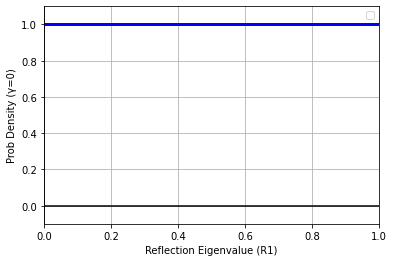

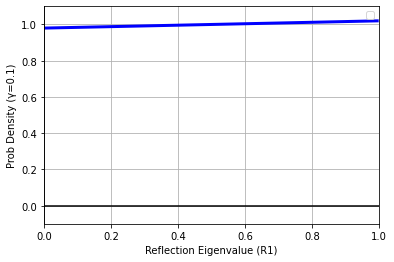

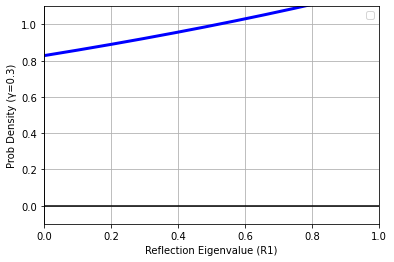

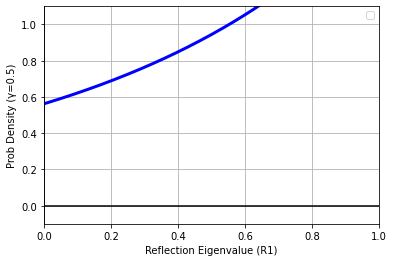

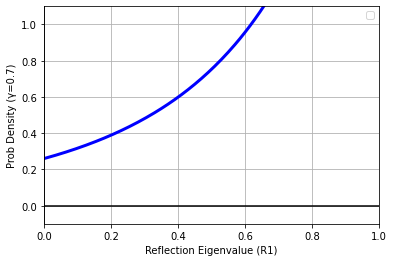

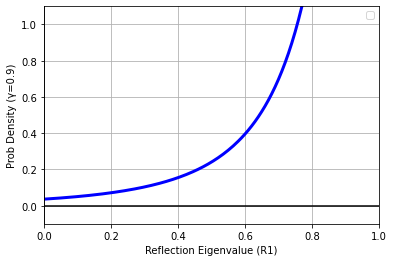

In [0]:
prob = lambda r: simple_prob_dist(r, 0)
show_plot(0, 1, prob, 'Prob Density (γ=0)',xlabel='Reflection Eigenvalue (R1)', y_lim=[-0.1,1.1])
for gamma in [0.1, 0.3, 0.5, 0.7, 0.9]:
  prob = lambda r: simple_prob_dist(r, gamma)
  show_plot(0, 1, prob, 'Prob Density (γ='+ str(gamma) +')',xlabel='Reflection Eigenvalue (R1)', y_lim=[-0.1,1.1])

In [0]:
def simple_1(r):
  return simple_prob_dist(r, 0.1)
def simple_3(r):
  return simple_prob_dist(r, 0.3)
def simple_5(r):
  return simple_prob_dist(r, 0.5)
def simple_7(r):
  return simple_prob_dist(r, 0.7)
def simple_9(r):
  return simple_prob_dist(r, 0.9)

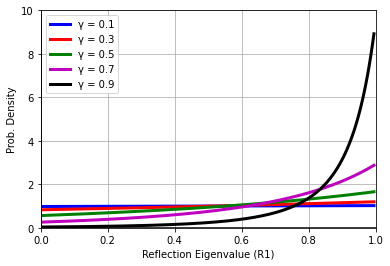

In [0]:
show_multi_plot(0, 1, [simple_1, simple_3, simple_5, simple_7, simple_9],
          ylabel='Prob. Density',
          xlabel='Reflection Eigenvalue (R1)',
          legend=['γ = 0.1', 'γ = 0.3', 'γ = 0.5', 'γ = 0.7', 'γ = 0.9'],
          y_lim=[0,10])

# Conductance and Shot Noise Cumulants

In [0]:
def cond_fst_moment(a):
  return 1 - linear_average(a)

def cond_snd_moment(a):
  return 1 - 2 * linear_average(a) + square_average(a)

def cond_snd_cumulant(a):
  return square_average(a) - linear_average(a)**2

def cond_thd_cumulant(a):
  lin = linear_average(a)
  sqr = square_average(a)
  cube = cube_average(a)
  return (3 * sqr * lin) - (2 * lin**3) - cube

In [0]:
def produce_list(low_b, upper_b, steps, map_func):
  gammas = list(np.arange(low_b,upper_b,step=steps))
  l = list(np.array([map_func(g) for g in gammas]))
  return gammas, l

In [0]:
lower = 0
upper = 1
# gammas = list(np.arange(low,up,step=s))
# cond_avgs = produce_list(low,up,s, cond_fst_moment)
# cond_variance = produce_list(low,up,s, cond_snd_cumulant)
# shot_noise_avgs = produce_list(low,up,s, shot_fst_cumulant)

## Conductance Distributions

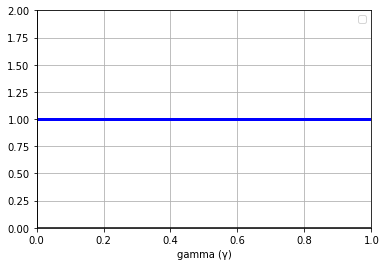

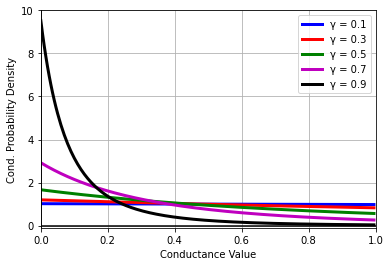

In [0]:
def cond_dist(c, gamma):
  return simple_prob_dist(1-c, gamma)

def cond_1(r):
  return cond_dist(r, 0.1)
def cond_3(r):
  return cond_dist(r, 0.3)
def cond_5(r):
  return cond_dist(r, 0.5)
def cond_7(r):
  return cond_dist(r, 0.7)
def cond_9(r):
  return cond_dist(r, 0.9)

show_plot(0,1,lambda x: cond_dist(x, 0), y_lim=[0,2])

show_multi_plot(0, 1, [cond_1, cond_3, cond_5, cond_7, cond_9],
          ylabel='Cond. Probability Density',
          xlabel='Conductance Value',
          legend=['γ = 0.1', 'γ = 0.3', 'γ = 0.5', 'γ = 0.7', 'γ = 0.9'],
          y_lim=[-0.1,10])

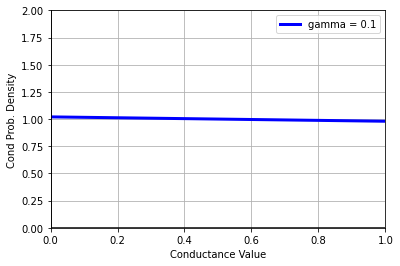

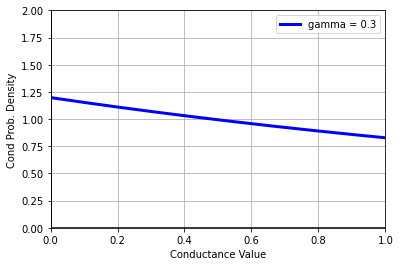

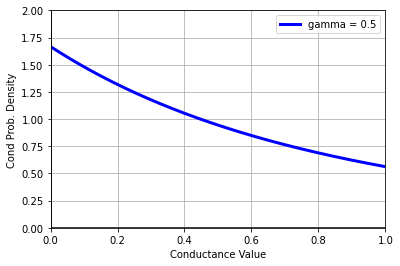

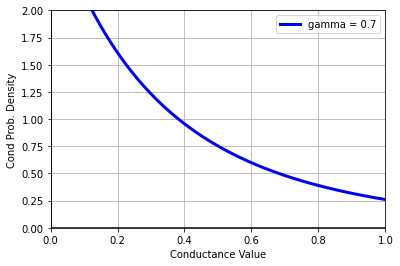

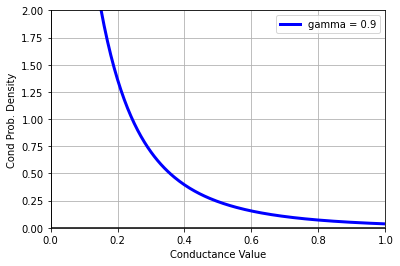

In [0]:
for i in range(0,len(gammas)):
  gamma = gammas[i]
  cond = [cond_1, cond_3, cond_5, cond_7, cond_9][i]
  show_plot(0,1, cond, y_lim=[0,2], xlabel='Conductance Value', ylabel='Cond Prob. Density',legend=['gamma = ' + str(gamma)])

## Plots of First Few Conductance Cumulants

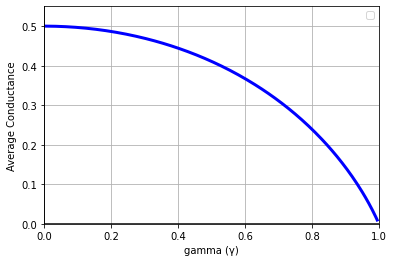

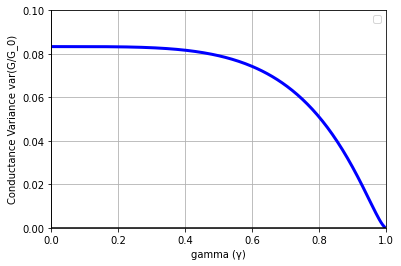

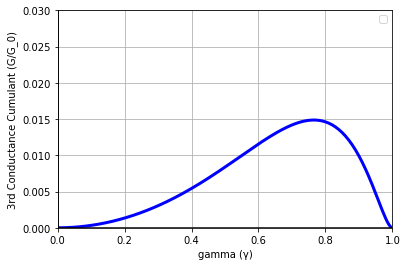

In [0]:
show_plot(lower, upper, cond_fst_moment, 'Average Conductance')
show_plot(lower, upper, cond_snd_cumulant, 'Conductance Variance var(G/G_0)', y_lim=[0, 0.1])
show_plot(lower, upper, cond_thd_cumulant, '3rd Conductance Cumulant (G/G_0)', y_lim=[0, 0.03])

## Plot of Skewness of Conductance

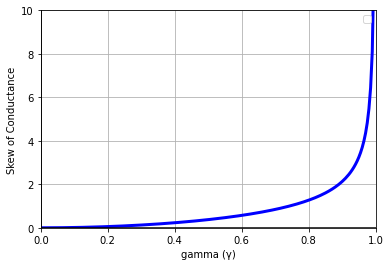

In [0]:
skew = lambda x: cond_thd_cumulant(x)/cond_snd_cumulant(x)**(3/2)
show_plot(lower, upper, skew, 'Skew of Conductance', y_lim=[0,10])

## Comparing Fourth Cumulant to Ideal Estimate

In [0]:
def rough_cond_frth_cumulant(a):
  fst = cond_fst_moment(a)
  snd = cond_snd_cumulant(a)
  thd = cond_thd_cumulant(a)
  r = 1/28
  r = r * (30 * thd + 6 * snd - 60 * fst * thd - 96 * snd**2)
  return r

# r = 1/14 * (...) - 4 * lin * cube - 3 * sqr**2 + 12 * lin**2 * sqr - 6 *lin**4
# 1/14 * (...) is an approximation of qrt

def cond_frth_cumulant(a):
  lin = linear_average(a)
  sqr = square_average(a)
  cube = cube_average(a)
  qrt = quart_average(a)
  return qrt - 4 * lin * cube - 3 * sqr**2 + 12 * lin**2 * sqr - 6 *lin**4

def diff_cond_frth_cumulant(a):
  return cond_frth_cumulant(a) - rough_cond_frth_cumulant(a)

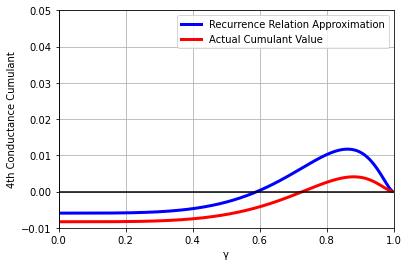

In [0]:
show_multi_plot(0, 1, [mp.autoprec(rough_cond_frth_cumulant), mp.autoprec(cond_frth_cumulant)],
          ylabel='4th Conductance Cumulant',
          xlabel='γ',
          legend=['Recurrence Relation Approximation', 'Actual Cumulant Value'],
          y_lim=[-0.01,0.05])

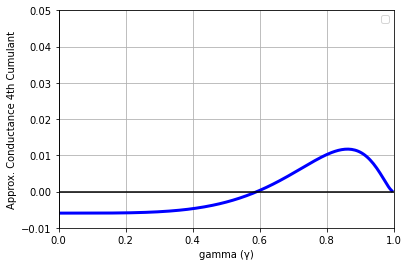

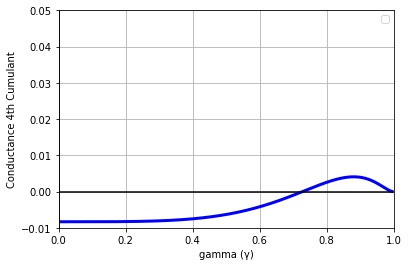

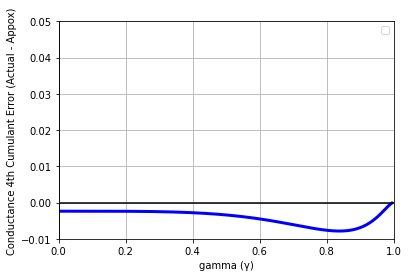

In [0]:
show_plot(0, 1, rough_cond_frth_cumulant, "Approx. Conductance 4th Cumulant", y_lim=[-0.01,0.05])
show_plot(0, 1, cond_frth_cumulant, "Conductance 4th Cumulant", y_lim=[-0.01,0.05])
# Approx. is slightly above actual
show_plot(0, 1, diff_cond_frth_cumulant, "Conductance 4th Cumulant Error (Actual - Appox)", y_lim=[-0.01,0.05])

## Shot Noise Distributions

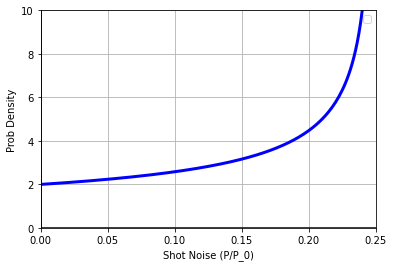

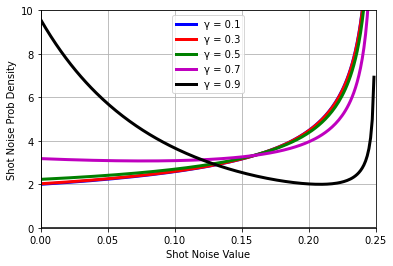

In [0]:
def shot_1(s):
  return shot_dist(s, 0.1)
def shot_3(s):
  return shot_dist(s, 0.3)
def shot_5(s):
  return shot_dist(s, 0.5)
def shot_7(s):
  return shot_dist(s, 0.7)
def shot_9(s):
  return shot_dist(s, 0.9)

def cumulative_shot_dist(s, gamma):
  g = gamma**2
  a = (1 - mp.sqrt(1-4*s))/2
  b = (1 + mp.sqrt(1-4*s))/2
  f1 = lambda x: x * (1-g)**2 / (1-g*x)**2
  t = 1 + f1(a) - f1(b)
  return t

def shot_dist(s, gamma):
  g = gamma**2
  a = (1 - mp.sqrt(1-4*s))/2
  b = (1 + mp.sqrt(1-4*s))/2
  f1 = lambda x: (1+g*x)/(1-g*x)**3
  t = f1(a) + f1(b)
  return t * (1-g)**2 / (1-2*a)

show_plot(0,0.25, lambda s: shot_dist(s, 0), y_lim=[0,10],
          ylabel='Prob Density',
          xlabel='Shot Noise (P/P_0)')

show_multi_plot(0, 0.25, [shot_1, shot_3, shot_5, shot_7, shot_9],
          ylabel='Shot Noise Prob Density',
          xlabel='Shot Noise Value',
          legend=['γ = 0.1', 'γ = 0.3', 'γ = 0.5', 'γ = 0.7', 'γ = 0.9'],
          y_lim=[0,10])

## Plots of First and Second Shot Noise Cumulant

In [0]:
def shot_fst_cumulant(a):
  return linear_average(a) - square_average(a)

def shot_snd_cumulant(a):
  lin = linear_average(a)
  sqr = square_average(a)
  cube = cube_average(a)
  quart = quart_average(a)
  return quart - 2 * cube + sqr - lin**2 + 2 * lin * sqr - sqr**2

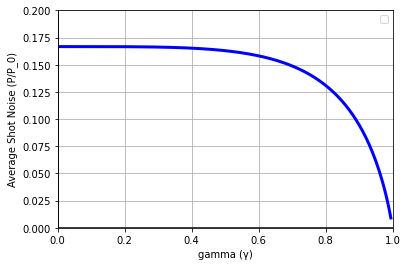

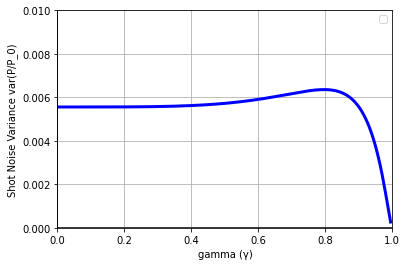

In [0]:
show_plot(lower, upper, shot_fst_cumulant, 'Average Shot Noise (P/P_0)', y_lim=[0,0.2])
show_plot(lower, upper, shot_snd_cumulant, 'Shot Noise Variance var(P/P_0)', y_lim=[0, 0.01])

## Cond and Shot Noise defined using Hypergeometric Function

In [0]:
def m_hyp_avg(gamma, m):
  g = gamma**2
  t1 = mp.hyp2f1(3, m+1, m+2, g)/(m+1)
  t2 = g * mp.hyp2f1(3, m+2, m+3, g)/(m+2)
  return (t1 + t2) * (1-g)**2

def hyp_lin_avg(gamma):
  return m_hyp_avg(gamma, 1)
def hyp_sqr_avg(gamma):
  return m_hyp_avg(gamma, 2)
def hyp_cube_avg(gamma):
  return m_hyp_avg(gamma, 3)
def hyp_qrt_avg(gamma):
  return m_hyp_avg(gamma, 4)

In [0]:
def hyp_cond_fst(a):
  return 1 - hyp_lin_avg(a)

def hyp_cond_snd(a):
  return hyp_sqr_avg(a) - hyp_lin_avg(a)**2

def hyp_cond_thd(a):
  lin = hyp_lin_avg(a)
  sqr = hyp_sqr_avg(a)
  cube = hyp_cube_avg(a)
  return (3 * sqr * lin) - (2 * lin**3) - cube

def hyp_cond_frth(a):
  return 0

def hyp_shot_fst(a):
  return (hyp_lin_avg(a) - hyp_sqr_avg(a))

def hyp_shot_snd(a):
  return (hyp_qrt_avg(a) - 2 * hyp_cube_avg(a) + hyp_sqr_avg(a) - (hyp_lin_avg(a) - hyp_sqr_avg(a))**2)

def hyp_shot_thd(a):
  u1 = hyp_shot_fst(a)
  u2 = hyp_qrt_avg(a) - 2 * hyp_cube_avg(a) + hyp_sqr_avg(a)
  u3 = hyp_cube_avg(a) - 3 * m_hyp_avg(a, 4) + 3 * m_hyp_avg(a, 5) - m_hyp_avg(a, 6)
  return u3 - 3 * u2 * u1 + 2 * u1**3

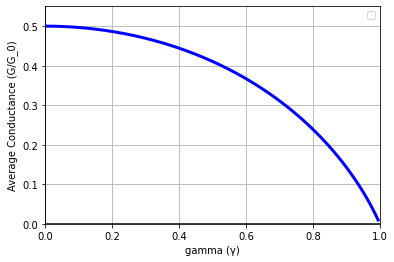

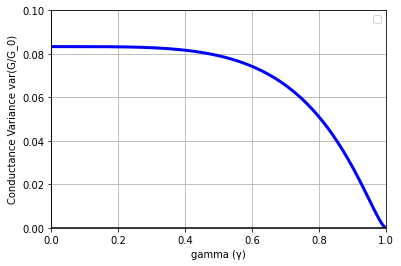

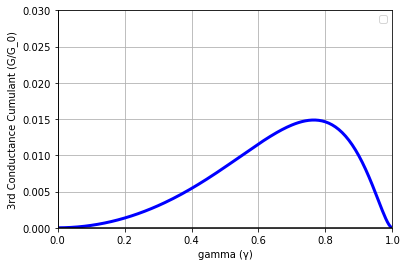

In [0]:
show_plot(lower, upper, hyp_cond_fst, 'Average Conductance (G/G_0)')
show_plot(lower, upper, hyp_cond_snd, 'Conductance Variance var(G/G_0)', y_lim=[0, 0.1])
show_plot(lower, upper, hyp_cond_thd, '3rd Conductance Cumulant (G/G_0)', y_lim=[0, 0.03])

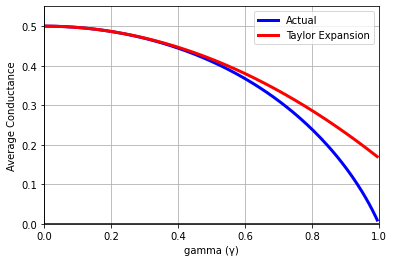

In [0]:
show_multi_plot(0,1,[hyp_cond_fst, lambda g: 0.5 - (g**2)/3], y_lim=[0,0.55], ylabel='Average Conductance',legend=['Actual', 'Taylor Expansion'])

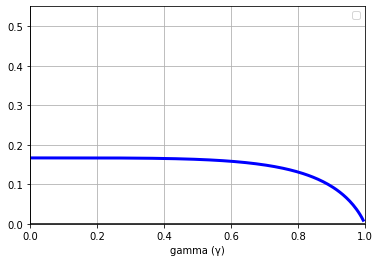

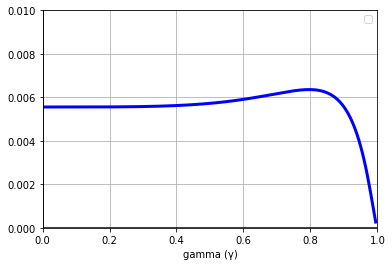

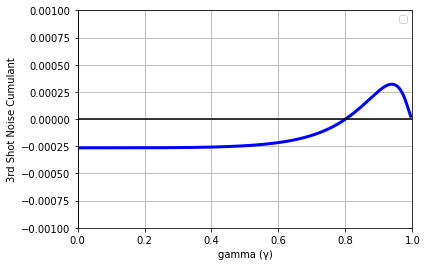

In [0]:
show_plot(0,1, hyp_shot_fst)
show_plot(0,1, hyp_shot_snd, y_lim=[0,0.01])
show_plot(0,1, hyp_shot_thd, y_lim=[-0.001,0.001], ylabel='3rd Shot Noise Cumulant')

# Reflection Eigenvalue Sampling (n=1, β = 2)

In [0]:
def sample_single_dist(gamma, max_height):
  actual_density = 0
  sample_density = 1
  
  while (actual_density < sample_density):
    r_sample = rand()
    sample_density = mp.rand() * max_height
    actual_density = simple_prob_dist(r_sample, gamma)

  return r_sample

def find_max1d(gamma, r_region):
  max_height = 0
  for i in r_region:
    h = simple_prob_dist(i, gamma)
    max_height = max(h, max_height)
  return max_height


def gen_1d_samples(gamma, num_of_samples):
  samples = []
  r_region = np.arange(0,1,0.01)
  max_height = find_max1d(gamma, r_region)

  for i in range(0, num_of_samples):
    samples.append(sample_single_dist(gamma, max_height))
    clear_output(wait=True)
    print('Found sample ' + str(i+1) + ' for γ=' + str(gamma))
  return samples

In [0]:
simples = []
for gamma in gammas:
  with open(str(gamma) + '_simple.txt', 'r') as f:
    sample_data = json.load(f)
    simples.append(sample_data)

# simples = []
# for gamma in [0.1, 0.3, 0.5, 0.7, 0.9]:
#   gamma_samples = gen_1d_samples(gamma, 1000)
#   with open(str(gamma) + '_simple.txt', 'w') as f:
#     json.dump(gamma_samples, f)
#   simples.append(gamma_samples)

FileNotFoundError: ignored

In [0]:
for i in range(0, len(simples)):
  data = simples[i]
  gamma = gammas[i]
  ax = plt.subplot(111)
  show_plot(0,1, lambda r: simple_prob_dist(r, gamma), ylabel='', y_lim=[0,2], ax=ax)
  plot_hist(data, x_lim=[0,1], ax=ax, xlabel='r value')

## Conductance Histograms

In [0]:
cond1_avgs = []
cond1_vars = []
cond1_thds = []
for i in range(0, len(simples)):
  gamma = gammas[i]
  cond_data = [1-x for x in simples[i]]

  ax = plt.subplot(111)
  show_plot(0,1,lambda c: cond_dist(c, gamma), ax=ax, y_lim=[0,2])
  plot_hist(cond_data,'Conductance (γ=' + str(gamma) +')', bins=20, ax=ax,x_lim=[0,1])

  cond_avg, cond_var, cond_thd = get_stats_of_data(cond_data, gamma)
  cond1_avgs.append(cond_avg)
  cond1_vars.append(cond_var)
  cond1_thds.append(cond_thd)

In [0]:
fig = plt.figure()
ax = plt.subplot(111)
show_plot(0,1,cond_fst_moment,y_lim=[0,0.6], ax=ax)

ax.scatter(gammas, cond1_avgs, marker='x', c='red', s=100)
ax.legend(['n=1 Cond. Average Fit', 'n=1 Sampled Cond. Average'])
ax.axhline(0, color='black')
ax.axvline(0, color='black')
plt.show()

In [0]:
fig = plt.figure()
ax = plt.subplot(111)
show_plot(0,1,cond_snd_cumulant,y_lim=[0,0.1], ax=ax)

ax.scatter(gammas, cond1_vars, marker='x', c='red', s=100)
ax.legend(['n=1 Cond. Var Fit', 'n=1 Sampled Cond. Var'])
ax.axhline(0, color='black')
ax.axvline(0, color='black')
plt.show()

In [0]:
fig = plt.figure()
ax = plt.subplot(111)
show_plot(0,1,cond_thd_cumulant,y_lim=[0,0.02], ax=ax)

ax.scatter(gammas, cond1_thds, marker='x', c='red', s=100)
ax.legend(['n=1 Cond. Thd. Cumulant Fit', 'n=1 Sampled Cond. Thd. Cumulants'])
ax.axhline(0, color='black')
ax.axvline(0, color='black')
plt.show()

## Shot Noise Histograms

In [0]:
shot1_avgs = []
shot1_vars = []
shot1_thds = []
for i in range(0, len(simples)):
  gamma = gammas[i]
  shot_data = [x*(1-x) for x in simples[i]]
  
  ax = plt.subplot(111)
  show_plot(0,0.25,lambda s: shot_dist(s, gamma), ax=ax, y_lim=[0,22])
  plot_hist(shot_data,'Shot Noise (γ=' + str(gamma) +')', bins=20, x_lim=[0,0.25], ax=ax)

  shot_avg, shot_var, shot_thd = get_stats_of_data(shot_data, gamma)
  shot1_avgs.append(shot_avg)
  shot1_vars.append(shot_var)
  shot1_thds.append(shot_thd)

In [0]:
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(gammas, shot1_avgs, marker='x', c='red', s=100)
show_plot(0,1,shot_fst_cumulant,y_lim=[0,0.2], ax=ax)
ax.legend(['n=1 Shot. Average', 'n=1 Sampled Shot Averages'])
ax.axhline(0, color='black')
ax.axvline(0, color='black')
plt.show()

In [0]:
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(gammas, shot1_vars, marker='x', c='red', s=100)
show_plot(0,1,shot_snd_cumulant, ax=ax, y_lim=[0,0.02])
ax.legend(['n=1 Shot. Var', 'n=1 Sampled Shot Vars'])
ax.axhline(0, color='black')
ax.axvline(0, color='black')
plt.show()

In [0]:
fig = plt.figure()
ax = plt.subplot(111)
show_plot(0,1, hyp_shot_thd, ax=ax, y_lim=[-0.001,0.001])
ax.scatter(gammas, shot1_thds, marker='x', c='red', s=100)
ax.legend(['n=1 Shot Thd. Cumulant', 'n=1 Sampled Shot Third Cumulant'])
ax.axhline(0, color='black')
ax.axvline(0, color='black')
plt.show()

# Arbitrary Number of Channels in Left Lead (One Channel in Right Lead)

Precision Error for small gamma as n_left gets larger

In [0]:
# def arb_left_norm_const(n_left, gamma):
#   g = gamma**2
#   N = n_left + 1

#   z = 1/(g**n_left * (1-g))

#   s = 0
#   for i in range(0, n_left):
#     bin_const = mp.binomial(n_left - 1, i) * (-1)**(n_left - i)
#     term = N * (1 - g**n_left) *((1 - g)**(N - i) - 1)/(N - i)
#     term += (1 - g**N - N * g**(n_left) * (1 - g)) * (1 - (1 - g)**(N - i - 1))/(n_left - i)
#     s += bin_const * term

#   return z * s

def arb_left_norm_const(n_left, gamma):
  g = gamma**2
  N = n_left + 1
  fst_term = (N * (1-g) - (1-g**N)) * mp.hyp2f1(N+1, 1, N, g)/(n_left)
  snd_term = g * (g**n_left * N * (1 - g) - (1 - g**N)) * mp.hyp2f1(N+1,2,N+1,g)/(n_left * N)
  return fst_term - snd_term

def arb_left_prob_dist(r, n_left, gamma):
  g = gamma**2
  N = n_left + 1
  p = (1-r)**(n_left - 1)
  p = p/(1-g * r)**(N+1)
  p = p*(N * (1-g) * (1- r * g**(N)) - (1 - g**N) * (1 - g * r))
  return p

def arb_norm_prob_dist(r, n_left, gamma):
  return arb_left_prob_dist(r, n_left, gamma)/arb_left_norm_const(n_left, gamma)

## Single Plots

In [0]:
def show_arb_single_plots(gamma):
  for n_left in [2,3,4,6,8,10]:
    prob = lambda r: arb_norm_prob_dist(r, n_left, gamma)
    show_plot(0, 1, prob,
              ylabel='Probability Density',
              xlabel='Reflection Eigenvalue (R1, nleft = '+ str(n_left) + ')',
              legend=['γ='+ str(gamma)],
              y_lim=[-1,10])
    
def show_arb_nleft_single_plots(n_left):
  for gamma in gammas:
    prob = lambda r: arb_norm_prob_dist(r, n_left, gamma)
    show_plot(0, 1, prob,
              ylabel='Probability Density',
              xlabel='Reflection Eigenvalue (R1, nleft = '+ str(n_left) + ')',
              legend=['γ = ' + str(gamma)],
              y_lim=[0,10])

In [0]:
  prob = lambda r: arb_norm_prob_dist(r, 10, 0.99)
  show_plot(0, 1, prob,
            ylabel='Probability Density',
            xlabel='Reflection Eigenvalue (R1, nleft = 10)',
            legend=['γ='+ str(0.99)],
            y_lim=[-1,10])

In [0]:
show_arb_single_plots(0)

In [0]:
show_arb_single_plots(0.1)

In [0]:
show_arb_nleft_single_plots(2)

## Multiple Lines on Single Plot

In [0]:
def ex_2_1(r):
  return arb_norm_prob_dist(r, 2, 0.1)
def ex_2_3(r):
  return arb_norm_prob_dist(r, 2, 0.3)
def ex_2_5(r):
  return arb_norm_prob_dist(r, 2, 0.5)
def ex_2_7(r):
  return arb_norm_prob_dist(r, 2, 0.7)
def ex_2_9(r):
  return arb_norm_prob_dist(r, 2, 0.9)

def ex_4_1(r):
  return arb_norm_prob_dist(r, 4, 0.1)
def ex_6_1(r):
  return arb_norm_prob_dist(r, 6, 0.1)
def ex_8_1(r):
  return arb_norm_prob_dist(r, 8, 0.1)
def ex_10_1(r):
  return arb_norm_prob_dist(r, 10, 0.1)

def ex_4_5(r):
  return arb_norm_prob_dist(r, 4, 0.5)
def ex_6_5(r):
  return arb_norm_prob_dist(r, 6, 0.5)
def ex_8_5(r):
  return arb_norm_prob_dist(r, 8, 0.5)
def ex_10_5(r):
  return arb_norm_prob_dist(r, 10, 0.5)

def ex_4_9(r):
  return arb_norm_prob_dist(r, 4, 0.9)
def ex_6_9(r):
  return arb_norm_prob_dist(r, 6, 0.9)
def ex_8_9(r):
  return arb_norm_prob_dist(r, 8, 0.9)
def ex_10_9(r):
  return arb_norm_prob_dist(r, 10, 0.9)

def ex_4_3(r):
  return arb_norm_prob_dist(r, 4, 0.3)
def ex_4_7(r):
  return arb_norm_prob_dist(r, 4, 0.7)
def ex_10_3(r):
  return arb_norm_prob_dist(r, 10, 0.3)
def ex_10_7(r):
  return arb_norm_prob_dist(r, 10, 0.7)
def ex_10_99(r):
  return arb_norm_prob_dist(r, 10, 0.99)

In [0]:
show_multi_plot(0, 1, [ex_2_1, ex_2_3, ex_2_5, ex_2_7, ex_2_9],
          ylabel='prob density',
          xlabel='Reflection Eigenvalue (R1, n_left=2)',
          legend=['γ = 0.1', 'γ = 0.3', 'γ = 0.5', 'γ = 0.7', 'γ = 0.9'],
          y_lim=[0,10])

show_multi_plot(0, 1, [ex_4_1, ex_4_3, ex_4_5, ex_4_7, ex_4_9],
          ylabel='prob density',
          xlabel='Reflection Eigenvalue (R1, n_left=4)',
          legend=['γ = 0.1', 'γ = 0.3', 'γ = 0.5', 'γ = 0.7', 'γ = 0.9'],
          y_lim=[0,10])

show_multi_plot(0, 1, [ex_10_3, ex_10_5, ex_10_7, ex_10_9, ex_10_99],
          ylabel='prob density',
          xlabel='Reflection Eigenvalue (R1, n_left=10)',
          legend=['γ = 0.3', 'γ = 0.5', 'γ = 0.7', 'γ = 0.9', 'γ = 0.99'],
          y_lim=[0,10])

In [0]:
show_multi_plot(0, 1, [ex_2_1, ex_4_1, ex_6_1, ex_8_1, ex_10_1],
          ylabel='prob density',
          xlabel='Reflection Eigenvalue (R1, γ=0.1)',
          legend=['n = 2', 'n = 4', 'n = 6', 'n = 8', 'n = 10'],
          y_lim=[0,10])

In [0]:
show_multi_plot(0, 1, [ex_2_5, ex_4_5, ex_6_5, ex_8_5, ex_10_5],
          ylabel='prob density',
          xlabel='Reflection Eigenvalue (R1, γ=0.5)',
          legend=['n = 2', 'n = 4', 'n = 6', 'n = 8', 'n = 10'],
          y_lim=[0,10])

In [0]:
show_multi_plot(0, 1, [ex_2_9, ex_4_9, ex_6_9, ex_8_9, ex_10_9],
          ylabel='prob density',
          xlabel='Reflection Eigenvalue (R1, γ=0.9)',
          legend=['n = 2', 'n = 4', 'n = 6', 'n = 8', 'n = 10'],
          y_lim=[0,2])

## Conductance

In [0]:
# Just take dist of Refl with 1-R1
for n_left in [2,3,4,6,8,10]:
  gamma = 0.5
  # prob = lambda r: arb_left_prob_dist(r, n_left, gamma)
  prob = lambda r: arb_norm_prob_dist(1 - r, n_left, gamma)
  show_plot(0, 1, prob,
            ylabel='Probability Density',
            xlabel='Cond Value (R1, nleft = '+ str(n_left) + ')',
            legend=['γ='+ str(gamma)],
            y_lim=[-1,10])

In [0]:
for gamma in gammas:
  n_left = 2
  prob = lambda r: arb_norm_prob_dist(1 - r, n_left, gamma)
  show_plot(0, 1, prob,
            ylabel='Probability Density',
            xlabel='Conductance Value (R1, nleft = '+ str(n_left) + ')',
            legend=['γ = ' + str(gamma)],
            y_lim=[-0.1,2])

### First Cumulant

In [0]:
# def arbL_avg(n_left, gamma):
#   g = gamma**2
#   N = n_left + 1
#   fst = 1/g
#   A = (N*(1-g) * g**(n_left) - (1 - g**N))
#   B = ((1-g**n_left) * N*(1-g))

#   norm = (g**N) * arb_left_norm_const(n_left, gamma)
#   snd = A * log(1 - g)

#   sum_t = 0
#   for i in range(0, n_left - 1):
#     t = (-(1-g))**(n_left - 1 - i) * mp.binomial(n_left-1, i)
#     t = t * (1- 1/(1-g)**(N - i - 2))
#     t = t/(N-i-2)
#     sum_t += t
#   snd = snd + A * sum_t

#   sum_t = 0
#   for i in range(0, n_left):
#     t = (-(1-g))**(n_left - 1 - i) * mp.binomial(n_left-1, i)
#     t = t * (1- 1/(1-g)**(N - i - 1))
#     t = t/(N-i-1)
#     sum_t += t
#   snd = snd + B * sum_t

#   return fst - snd/norm

def arbL_avg(n_left, gamma):
  g = gamma**2
  N = n_left + 1
  norm = arb_left_norm_const(n_left, gamma)
  fst_term = (N * (1-g) - (1-g**N)) * mp.hyp2f1(N+1, 2, N+1, g)/(n_left * N)
  snd_term = 2 * g * (g**n_left * N * (1 - g) - (1 - g**N)) * mp.hyp2f1(N+1,3,N+2,g)/(n_left * N * (N + 1))
  return (fst_term - snd_term)/norm

def arbL_cond_fst_cumulant(n_left, gamma):
  return 1 - arbL_avg(n_left, gamma)

In [0]:
def arb_cond_fst_2(gamma):
  return arbL_cond_fst_cumulant(2, gamma)
def arb_cond_fst_4(gamma):
  return arbL_cond_fst_cumulant(4, gamma)
def arb_cond_fst_6(gamma):
  return arbL_cond_fst_cumulant(6, gamma)
def arb_cond_fst_8(gamma):
  return arbL_cond_fst_cumulant(8, gamma)
def arb_cond_fst_10(gamma):
  return arbL_cond_fst_cumulant(10, gamma)

In [0]:
print(arb_cond_fst_2(0.1))
show_plot(0,1, arb_cond_fst_2, y_lim=[-10,10])

In [0]:
show_multi_plot(0, 1, [arb_cond_fst_2, arb_cond_fst_4, arb_cond_fst_6
                       , arb_cond_fst_8, arb_cond_fst_10],
          ylabel='Cond Average',
          xlabel='gamma Value',
          legend=['n_left = 2', 'n_left = 4', 'n_left = 6', 'n_left = 8', 'n_left = 10'],
          y_lim=[-0.1,1])

In [0]:
# for n_left in [2,3,4,6,8,10]:
#   cond_fst = lambda gamma: arbL_cond_fst_cumulant(n_left, gamma)
#   show_plot(0, 1, cond_fst,
#             ylabel='Cond. First Cumulant (Average)',
#             xlabel='Gamma value (n_left=' + str(n_left) + ')',
#             y_lim=[-0.1,1])

## Hypergeometric Function Cumulants

In [0]:
def mth_arb_average(m, gamma, n_left):
  norm = arb_left_norm_const(n_left, gamma)
  g = gamma**2
  N = n_left + 1
  u = N * (1-g) - (1-g**N)
  v = g * (N * (1-g) * g**n_left - (1-g**N))

  t_1 = u * mp.fac(m) * mp.fac(n_left - 1) * mp.hyp2f1(N+1, m+1, N+m, g)/mp.fac(n_left + m)
  t_2 = v * mp.fac(m+1) * mp.fac(n_left - 1) * mp.hyp2f1(N+1, m+2, N+m+1, g)/mp.fac(N + m)
  return (t_1 -t_2)/norm

### Conductance

In [0]:
def hyp_cond_arb_fst(n_left, gamma):
  return 1 - mth_arb_average(1, gamma, n_left)

def hyp_cond_arb_snd(n_left, gamma):
  return mth_arb_average(2, gamma, n_left) - mth_arb_average(1, gamma, n_left)**2

def hyp_cond_arb_thd(n_left, gamma):
  lin = mth_arb_average(1, gamma, n_left)
  sqr = mth_arb_average(2, gamma, n_left)
  cube = mth_arb_average(3, gamma, n_left)
  return (3 * sqr * lin) - (2 * lin**3) - cube

In [0]:
def arb_hyp_cond_fst_2(gamma):
  return hyp_cond_arb_fst(2, gamma)
def arb_hyp_cond_fst_4(gamma):
  return hyp_cond_arb_fst(4, gamma)
def arb_hyp_cond_fst_6(gamma):
  return hyp_cond_arb_fst(6, gamma)
def arb_hyp_cond_fst_8(gamma):
  return hyp_cond_arb_fst(8, gamma)
def arb_hyp_cond_fst_10(gamma):
  return hyp_cond_arb_fst(10, gamma)

show_multi_plot(0, 1, [arb_hyp_cond_fst_2,
                       arb_hyp_cond_fst_4,
                       arb_hyp_cond_fst_6,
                       arb_hyp_cond_fst_8, 
                       arb_hyp_cond_fst_10],
          ylabel='Cond Average',
          xlabel='gamma Value',
          legend=['n_left = 2', 'n_left = 4', 'n_left = 6', 'n_left = 8', 'n_left = 10'],
          y_lim=[-0.1,1])

In [0]:
def arb_hyp_cond_snd_2(gamma):
  return hyp_cond_arb_snd(2, gamma)
def arb_hyp_cond_snd_4(gamma):
  return hyp_cond_arb_snd(4, gamma)
def arb_hyp_cond_snd_6(gamma):
  return hyp_cond_arb_snd(6, gamma)
def arb_hyp_cond_snd_8(gamma):
  return hyp_cond_arb_snd(8, gamma)
def arb_hyp_cond_snd_10(gamma):
  return hyp_cond_arb_snd(10, gamma)
  
show_multi_plot(0, 1, [arb_hyp_cond_snd_2,
                       arb_hyp_cond_snd_4,
                       arb_hyp_cond_snd_6,
                       arb_hyp_cond_snd_8, 
                       arb_hyp_cond_snd_10],
          ylabel='Cond Variance',
          xlabel='gamma Value',
          legend=['n_left = 2', 'n_left = 4', 'n_left = 6', 'n_left = 8', 'n_left = 10'],
          y_lim=[-0,0.1])

In [0]:
def arb_hyp_cond_thd_2(gamma):
  return hyp_cond_arb_thd(2, gamma)
def arb_hyp_cond_thd_4(gamma):
  return hyp_cond_arb_thd(4, gamma)
def arb_hyp_cond_thd_6(gamma):
  return hyp_cond_arb_thd(6, gamma)
def arb_hyp_cond_thd_8(gamma):
  return hyp_cond_arb_thd(8, gamma)
def arb_hyp_cond_thd_10(gamma):
  return hyp_cond_arb_thd(10, gamma)
  
show_multi_plot(0, 1, [arb_hyp_cond_thd_2,
                       arb_hyp_cond_thd_4,
                       arb_hyp_cond_thd_6,
                       arb_hyp_cond_thd_8, 
                       arb_hyp_cond_thd_10],
          ylabel='Cond Thd Cumulant',
          xlabel='gamma Value',
          legend=['n_left = 2', 'n_left = 4', 'n_left = 6', 'n_left = 8', 'n_left = 10'],
          y_lim=[-0.01,0.02])

### Shot Noise

In [0]:
def hyp_shot_arb_fst(n_left, gamma):
  return mth_arb_average(1, gamma, n_left) - mth_arb_average(2, gamma, n_left)

def hyp_shot_arb_snd(n_left, gamma):
  snd_moment = mth_arb_average(2, gamma, n_left) - 2*mth_arb_average(3, gamma, n_left) + mth_arb_average(4, gamma, n_left)
  return snd_moment - hyp_shot_arb_fst(n_left, gamma)**2

def hyp_shot_arb_thd(n_left, gamma):
  fst_moment = hyp_shot_arb_fst(n_left, gamma)
  snd_moment = mth_arb_average(2, gamma, n_left) - 2*mth_arb_average(3, gamma, n_left) + mth_arb_average(4, gamma, n_left)
  thd_moment = mth_arb_average(3, gamma, n_left) - 3*mth_arb_average(4, gamma, n_left) + 3*mth_arb_average(5, gamma, n_left) - mth_arb_average(6, gamma, n_left) 
  return thd_moment - 3 * snd_moment * fst_moment + 2 * fst_moment**3

In [0]:
def arb_hyp_shot_fst_2(gamma):
  return hyp_shot_arb_fst(2, gamma)
def arb_hyp_shot_fst_4(gamma):
  return hyp_shot_arb_fst(4, gamma)
def arb_hyp_shot_fst_6(gamma):
  return hyp_shot_arb_fst(6, gamma)
def arb_hyp_shot_fst_8(gamma):
  return hyp_shot_arb_fst(8, gamma)
def arb_hyp_shot_fst_10(gamma):
  return hyp_shot_arb_fst(10, gamma)
  
show_multi_plot(0, 1, [arb_hyp_shot_fst_2, arb_hyp_shot_fst_4, arb_hyp_shot_fst_6
                       , arb_hyp_shot_fst_8, arb_hyp_shot_fst_10],
          ylabel='Shot Noise Average',
          xlabel='gamma Value',
          legend=['n_left = 2', 'n_left = 4', 'n_left = 6', 'n_left = 8', 'n_left = 10'],
          y_lim=[-0,0.25])

In [0]:
def arb_hyp_shot_snd_2(gamma):
  return hyp_shot_arb_snd(2, gamma)
def arb_hyp_shot_snd_4(gamma):
  return hyp_shot_arb_snd(4, gamma)
def arb_hyp_shot_snd_6(gamma):
  return hyp_shot_arb_snd(6, gamma)
def arb_hyp_shot_snd_8(gamma):
  return hyp_shot_arb_snd(8, gamma)
def arb_hyp_shot_snd_10(gamma):
  return hyp_shot_arb_snd(10, gamma)
  
show_multi_plot(0, 1, [arb_hyp_shot_snd_2, arb_hyp_shot_snd_4, arb_hyp_shot_snd_6
                       , arb_hyp_shot_snd_8, arb_hyp_shot_snd_10],
          ylabel='Shot Noise Variance',
          xlabel='gamma Value',
          legend=['n_left = 2', 'n_left = 4', 'n_left = 6', 'n_left = 8', 'n_left = 10'],
          y_lim=[-0,0.01])

In [0]:
def arb_hyp_shot_thd_2(gamma):
  return hyp_shot_arb_thd(2, gamma)
def arb_hyp_shot_thd_4(gamma):
  return hyp_shot_arb_thd(4, gamma)
def arb_hyp_shot_thd_6(gamma):
  return hyp_shot_arb_thd(6, gamma)
def arb_hyp_shot_thd_8(gamma):
  return hyp_shot_arb_thd(8, gamma)
def arb_hyp_shot_thd_10(gamma):
  return hyp_shot_arb_thd(10, gamma)
  
show_multi_plot(0, 1, [arb_hyp_shot_thd_2, arb_hyp_shot_thd_4, arb_hyp_shot_thd_6
                       , arb_hyp_shot_thd_8, arb_hyp_shot_thd_10],
          ylabel='Shot Noise 3rd Cumulant',
          xlabel='gamma Value',
          legend=['n_left = 2', 'n_left = 4', 'n_left = 6', 'n_left = 8', 'n_left = 10'],
          y_lim=[-0.0005,0.0005])

## Reflection Eigenvalue Sampling

In [0]:
def find_arb_max(prob_dist, region):
  max_h = 0
  for i in region:
    p = prob_dist(i)
    max_h = max(max_h, p)
  return max_h

def sample_arb_dist(prob_dist, max_height):
  sampled_h = 1
  dist_h = 0
  while not (sampled_h <= dist_h):
    sample = rand()
    sampled_h = rand() * max_height
    dist_h = prob_dist(sample)
  return sample

def arb_sampling(num_sampling, prob_dist, n_left, gamma):
  samples = []
  region = np.arange(0, 1, 0.01)
  max_height = find_arb_max(prob_dist, region)

  for i in range(0, num_sampling):
    data = sample_arb_dist(prob_dist, max_height)
    samples.append(data)
    clear_output(wait=True)
    print('Found sample ' + str(i+1) + ' for γ=' + str(gamma) + ' n_left=' + str(n_left))
  return samples

In [0]:
arb_samples = []
with open('arb_samples.txt', 'r') as f:
  arb_samples = json.load(f)

# arb_samples = []
# for gamma in [0.1, 0.3, 0.5, 0.7, 0.9]:
#   row = []
#   for n_left in [2, 4, 6, 8, 10]:
#     t_samples = arb_sampling(1000, lambda x: arb_left_prob_dist(x, n_left, gamma), n_left, gamma)
#     row.append(t_samples)
#   arb_samples.append(row)

# with open('arb_samples.txt', 'w') as f:
#   json.dump(arb_samples, f)

### Conductance

In [0]:
cond_arb_avgs = []
cond_arb_vars = []
cond_arb_thds = []
for i in range(0, len(arb_samples)):
  gamma_samples = arb_samples[i]
  gamma = gammas[i]
  row_avgs = []
  row_vars = []
  row_thds = []
  for j in range(0, len(gamma_samples)):
    n_left = n_lefts[j]
    samples = gamma_samples[j]
    cond_data = [1-x for x in samples]

    ax = plt.subplot(111)
    show_plot(0,1,lambda r: arb_left_prob_dist(1-r, n_left, gamma), ax=ax, y_lim=[0,2])
    plot_hist(cond_data, 'Conductance (γ=' + str(gamma) +', n_left=' + str(n_left) + ')',
              bins=20, ax=ax, x_lim=[0,1], color='skyblue')

    cond_avg, cond_var, cond_thd = get_stats_of_data(cond_data, gamma)
    row_avgs.append(cond_avg)
    row_vars.append(cond_var)
    row_thds.append(cond_thd)
  cond_arb_avgs.append(row_avgs)
  cond_arb_vars.append(row_vars)
  cond_arb_thds.append(row_thds)

In [0]:
for i in range(0, len(gammas)):
  gamma = gammas[i]
  fig = plt.figure()
  ax = plt.subplot(111)
  show_plot(0,10, lambda n: arbL_cond_fst_cumulant(n, gamma), ax=ax,
            y_lim=[0,1],xlabel='n_left (gamma =' + str(gamma) + ')', ylabel='Conductance Average')
  ax.scatter(n_lefts, cond_arb_avgs[i], marker='x', c='red', s=100, zorder=3)
  ax.legend(['Theoretical'])
  ax.axhline(0, color='black')
  ax.axvline(0, color='black')
  plt.show()

In [0]:
for i in range(0, len(n_lefts)):
  n_left = n_lefts[i]
  fig = plt.figure()
  ax = plt.subplot(111)
  show_plot(0,1, lambda g: hyp_cond_arb_fst(n_left, g), ax=ax, y_lim=[0,1], 
            ylabel='Conductance Average')
  ax.set_xlabel('gamma (n_left=' + str(n_left) + ')')
  ax.scatter(gammas, np.array(cond_arb_avgs).T.tolist()[i], marker='x', c='red', s=100, zorder=3)
  ax.legend(['Theoretical'])
  ax.axhline(0, color='black')
  ax.axvline(0, color='black')
  plt.show()

In [0]:
for i in range(0, len(n_lefts)):
  n_left = n_lefts[i]
  fig = plt.figure()
  ax = plt.subplot(111)
  show_plot(0,1, lambda g: hyp_cond_arb_snd(n_left, g), ax=ax, y_lim=[0,.1], 
            ylabel='Conductance Variance')
  ax.set_xlabel('gamma (n_left=' + str(n_left) + ')')
  ax.scatter(gammas, np.array(cond_arb_vars).T.tolist()[i], marker='x', c='red', s=100, zorder=3)
  ax.legend(['Theoretical'])
  ax.axhline(0, color='black')
  ax.axvline(0, color='black')
  plt.show()

In [0]:
for i in range(0, len(n_lefts)):
  n_left = n_lefts[i]
  fig = plt.figure()
  ax = plt.subplot(111)
  show_plot(0,1, lambda g: hyp_cond_arb_thd(n_left, g), ax=ax, y_lim=[-.01,0.02],
            ylabel='Conductance Third Cumulant')
  ax.set_xlabel('gamma (n_left=' + str(n_left) + ')')
  ax.scatter(gammas, np.array(cond_arb_thds).T.tolist()[i], marker='x', c='red', s=100, zorder=3)
  ax.legend(['Sampled Cond. Thd. (n_left=' + str(n_left) + ')'])
  ax.axhline(0, color='black')
  ax.axvline(0, color='black')
  plt.show()

### Shot Noise

In [0]:
shot_arb_avgs = []
shot_arb_vars = []
shot_arb_thds = []
for i in range(0, len(arb_samples)):
  gamma_samples = arb_samples[i]
  gamma = gammas[i]
  row_avgs = []
  row_vars = []
  row_thds = []
  for j in range(0, len(gamma_samples)):
    n_left = n_lefts[j]
    samples = gamma_samples[j]
    shot_data = [x*(1-x) for x in samples]

    ax = plt.subplot(111)
    # show_plot(0,1,lambda r: arb_left_prob_dist(1-r, n_left, gamma), ax=ax, y_lim=[0,2])
    plot_hist(shot_data, 'Shot Noise (γ=' + str(gamma) +', n_left=' + str(n_left) + ')',
              bins=20, ax=ax, x_lim=[0,0.25], color='skyblue')

    shot_avg, shot_var, shot_thd = get_stats_of_data(shot_data, gamma)
    row_avgs.append(shot_avg)
    row_vars.append(shot_var)
    row_thds.append(shot_thd)
  shot_arb_avgs.append(row_avgs)
  shot_arb_vars.append(row_vars)
  shot_arb_thds.append(row_thds)

In [0]:
for i in range(0, len(gammas)):
  gamma = gammas[i]
  fig = plt.figure()
  ax = plt.subplot(111)
  show_plot(0,10, lambda n: hyp_shot_arb_fst(n, gamma), ax=ax,
            y_lim=[0,0.2],xlabel='n_left (gamma = ' + str(gamma) + ')', ylabel='Conductance Average')
  ax.scatter(n_lefts, shot_arb_avgs[i], marker='x', c='red', s=100, zorder=3)
  ax.legend(['Theoretical'])
  ax.axhline(0, color='black')
  ax.axvline(0, color='black')
  plt.show()

In [0]:
for i in range(0, len(n_lefts)):
  n_left = n_lefts[i]
  fig = plt.figure()
  ax = plt.subplot(111)
  show_plot(0,1, lambda g: hyp_shot_arb_fst(n_left, g), ax=ax, y_lim=[0,0.25],xlabel='gamma', 
            ylabel='Shot Noise Average')
  ax.set_xlabel('gamma (n_left=' + str(n_left) + ')')
  ax.scatter(gammas, np.array(shot_arb_avgs).T.tolist()[i], marker='x', c='red', s=100, zorder=3)
  ax.legend(['Theoretical'])
  ax.axhline(0, color='black')
  ax.axvline(0, color='black')
  plt.show()

In [0]:
for i in range(0, len(n_lefts)):
  n_left = n_lefts[i]
  fig = plt.figure()
  ax = plt.subplot(111)
  show_plot(0,1, lambda g: hyp_shot_arb_snd(n_left, g), ax=ax, y_lim=[0,0.01],xlabel='gamma', 
            ylabel='Shot Noise Variance')
  ax.set_xlabel('gamma (n_left=' + str(n_left) + ')')
  ax.scatter(gammas, np.array(shot_arb_vars).T.tolist()[i], marker='x', c='red', s=100, zorder=3)
  ax.legend(['Theoretical'])
  ax.axhline(0, color='black')
  ax.axvline(0, color='black')
  plt.show()

In [0]:
for i in range(0, len(n_lefts)):
  n_left = n_lefts[i]
  fig = plt.figure()
  ax = plt.subplot(111)
  show_plot(0,1, lambda g: hyp_shot_arb_thd(n_left, g), ax=ax, y_lim=[-0.0005,0.0005],xlabel='gamma', 
            ylabel='Shot Noise Third Cumulant')
  ax.set_xlabel('gamma (n_left=' + str(n_left) + ')')
  ax.scatter(gammas, np.array(shot_arb_thds).T.tolist()[i], marker='x', c='red', s=100, zorder=3)
  ax.legend(['Theoretical'])
  ax.axhline(0, color='black')
  ax.axvline(0, color='black')
  plt.show()

# Prob Dist (n = 2, β = 2) [IMP: normalisation?]

In [0]:
def prob_dist_2(gamma, r1, r2):
  g = gamma**2

  u1 = 1/(1 - g * r1)
  u2 = 1/(1 - g * r2)
  p = ((1-g)**8) * ((r2-r1)**2) * (u1*u2)**4
  
  A = 1/3 - (u1+u2)/2 + u1*u2
  B = -1/2 + 2*(u1+u2)/3 - u1*u2
  C = 1/5 - (u1+u2)/4 + u1*u2/3

  t = A/5 + (B - A *(u1+u2))/4 + (C- B*(u1+u2) + A*u1*u2)/3 + (u1*u2*B - C*(u1+u2))/2 + C*u1*u2
  p = p * t
  return p

In [0]:
def show_prob_given_y_gamma(gamma, ymax=0.02):
  for y in np.arange(0,1.01,step=0.05):
    prob = lambda x: prob_dist_2(gamma, x, y)
    show_plot(lower, upper, prob,
              'prob density', xlabel='r1 given: γ=' + str(gamma) + ', r2=' + str(y), y_lim=[-0.001,ymax])

## Slice Distributions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


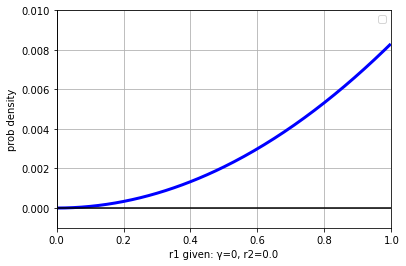

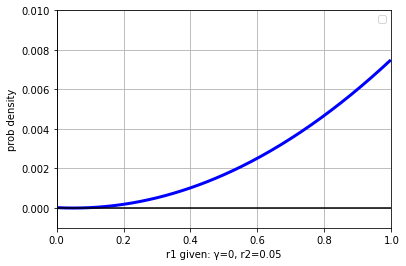

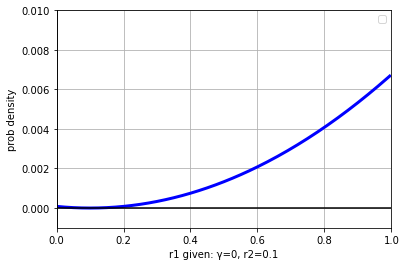

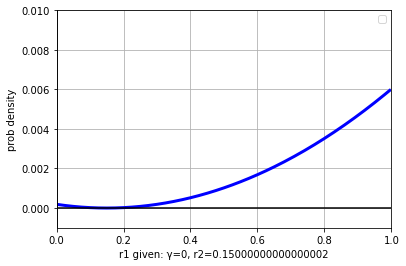

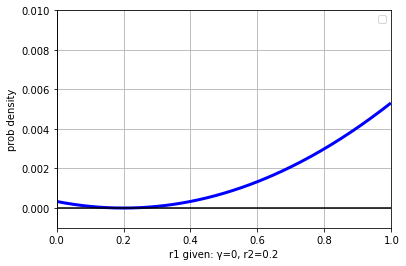

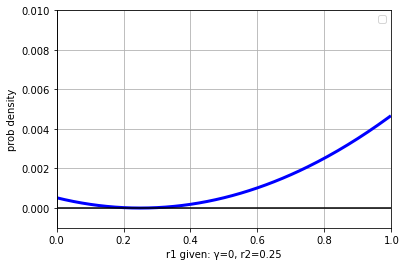

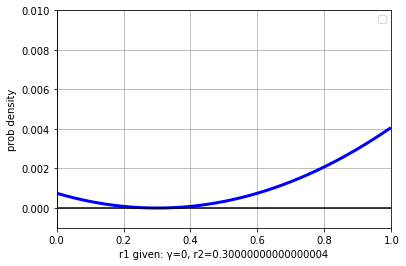

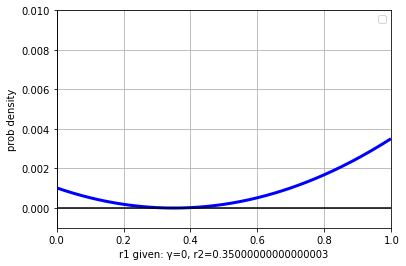

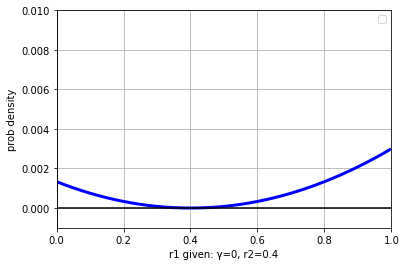

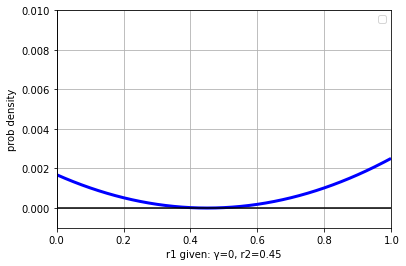

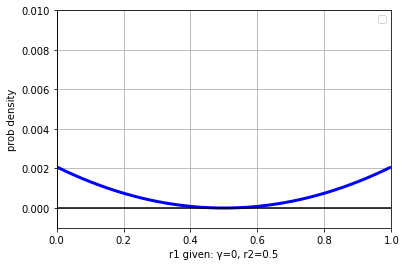

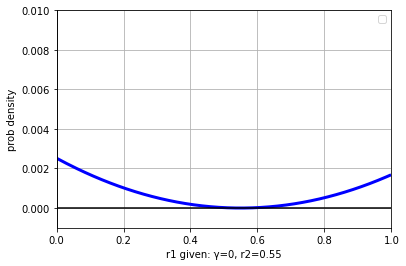

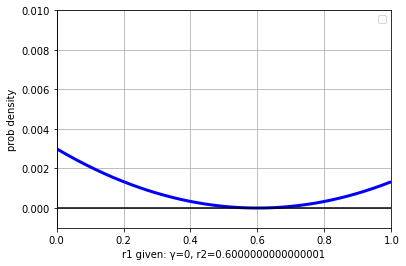

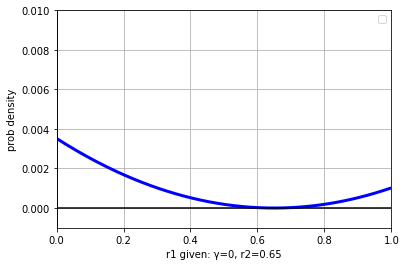

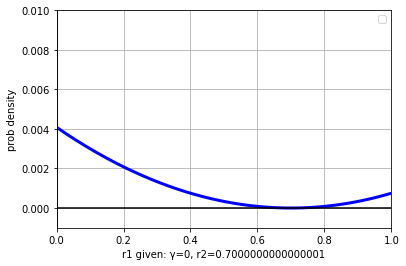

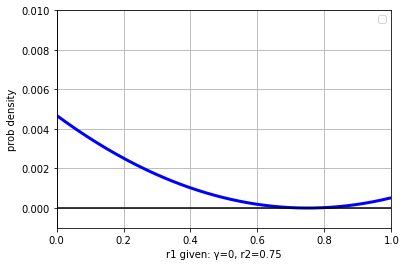

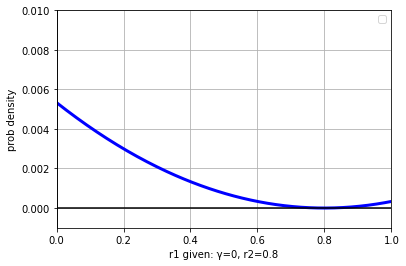

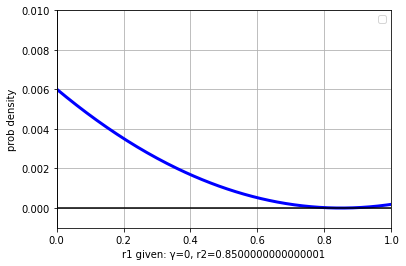

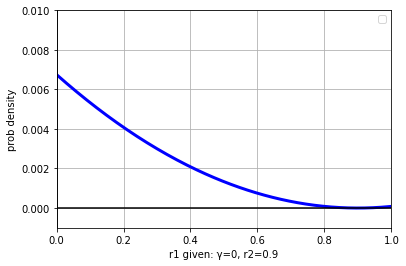

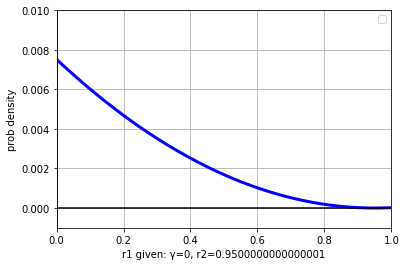

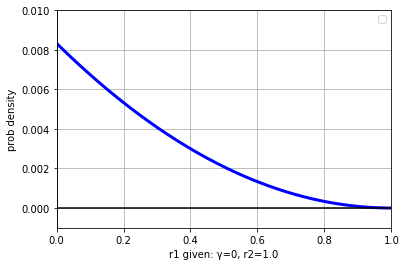

In [0]:
show_prob_given_y_gamma(0,ymax=0.01)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


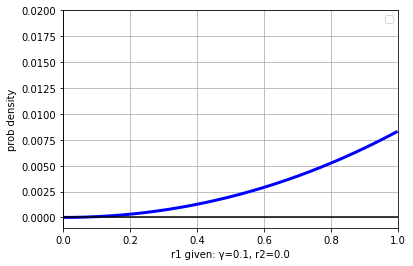

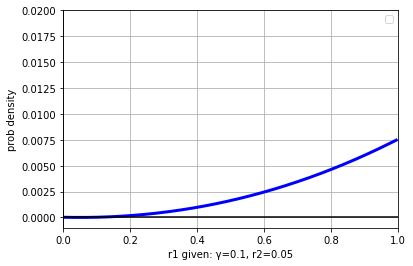

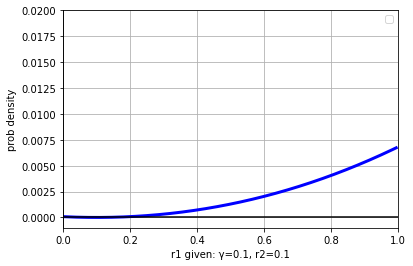

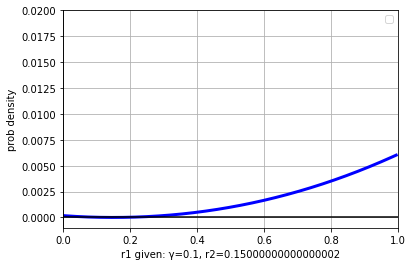

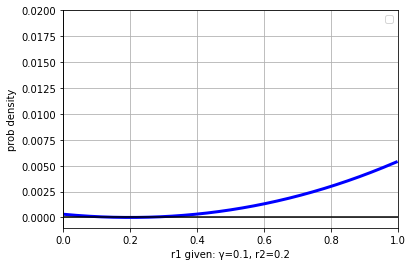

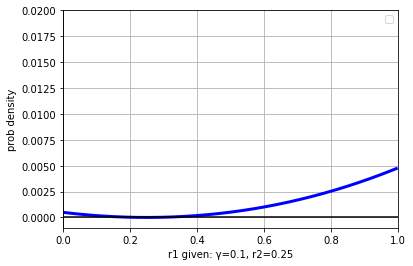

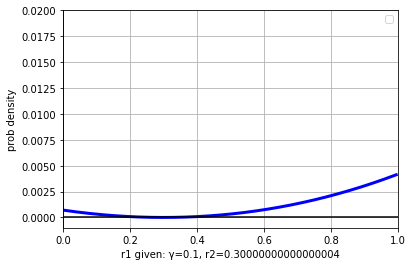

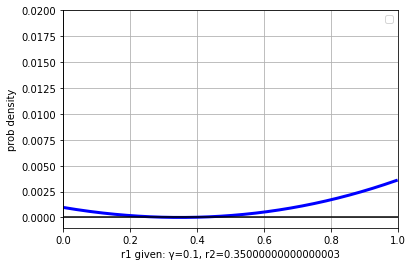

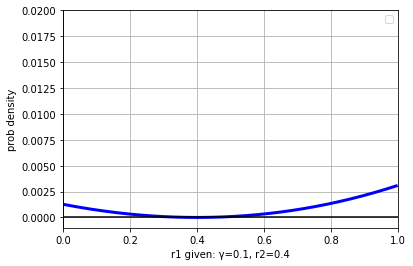

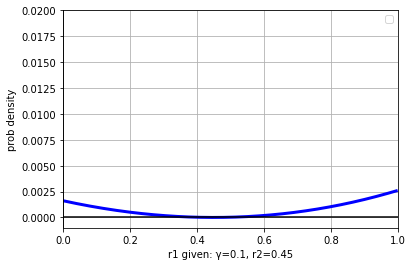

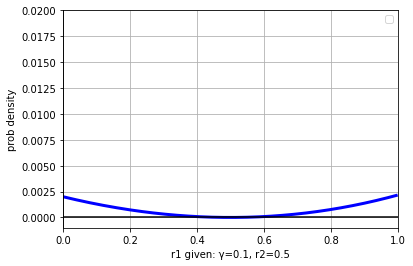

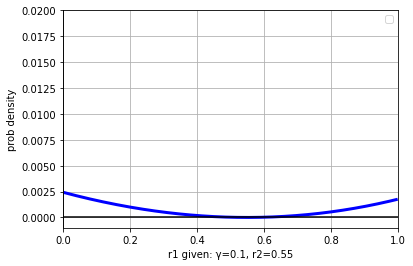

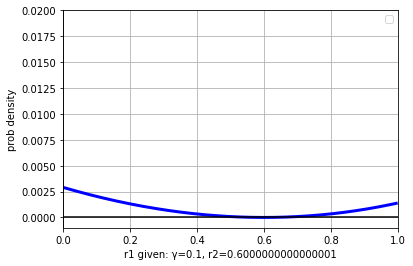

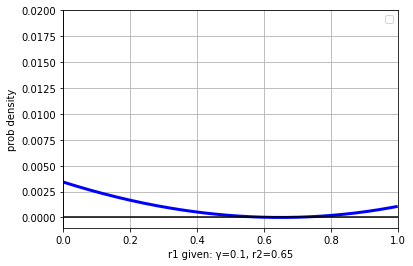

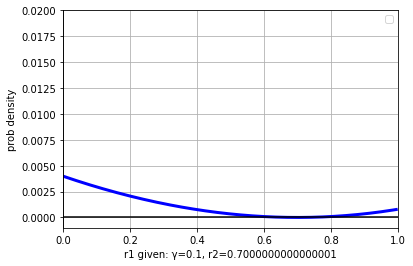

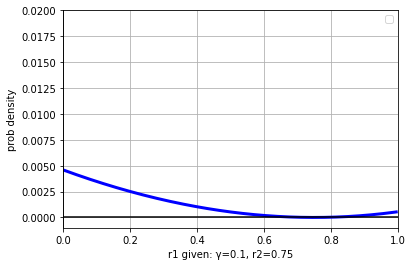

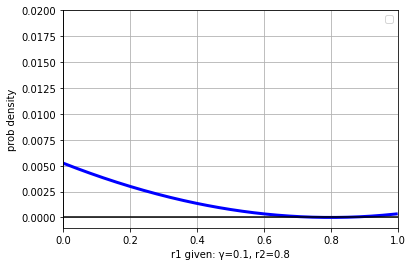

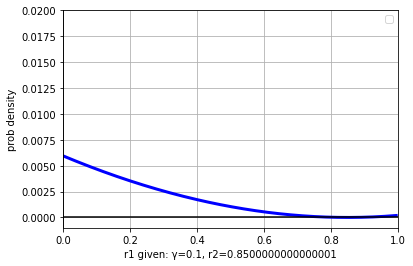

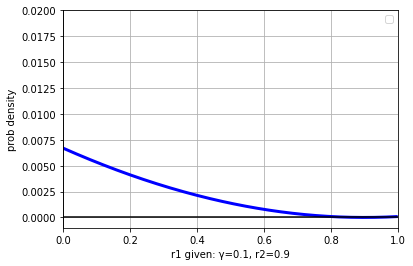

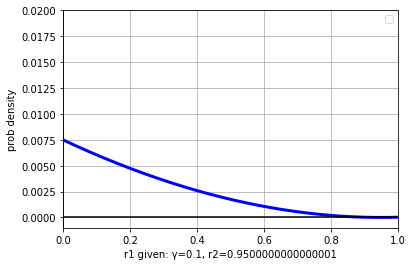

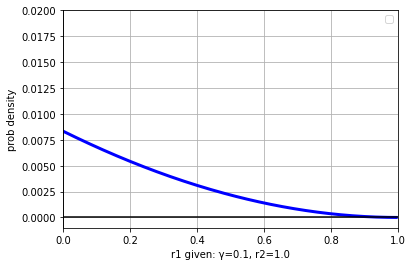

In [0]:
show_prob_given_y_gamma(0.1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


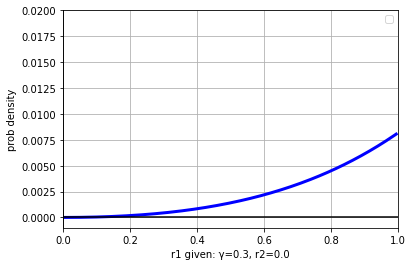

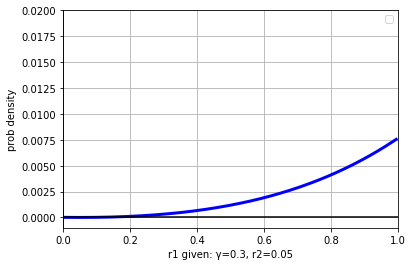

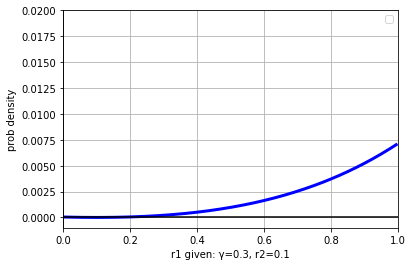

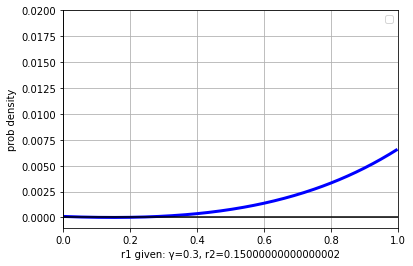

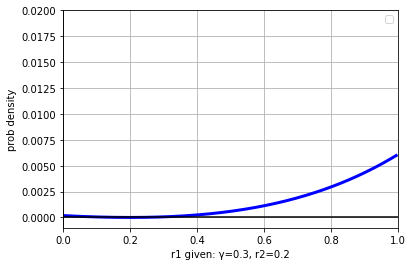

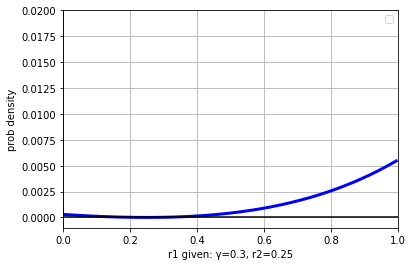

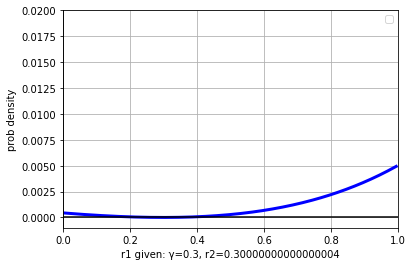

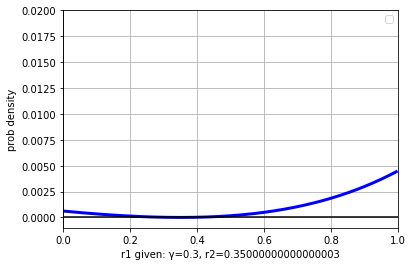

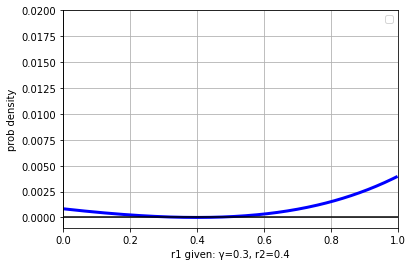

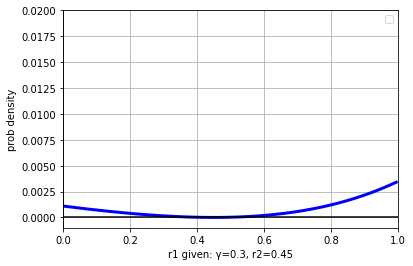

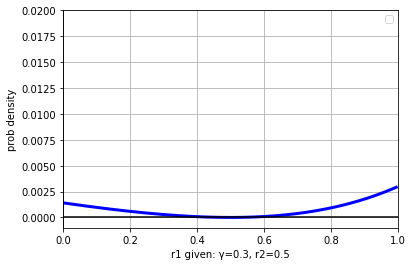

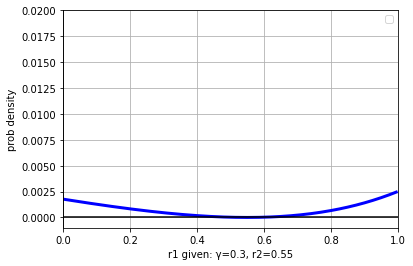

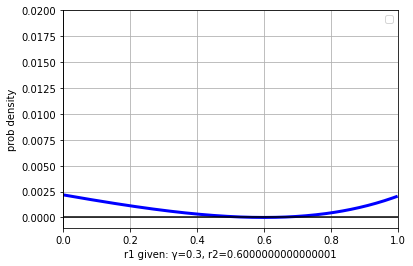

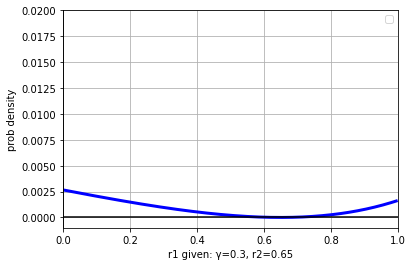

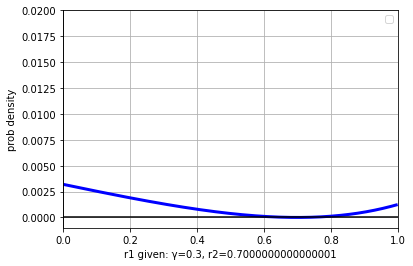

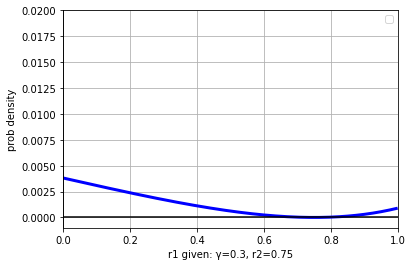

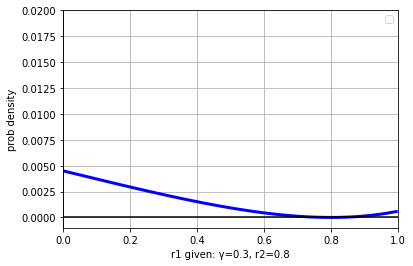

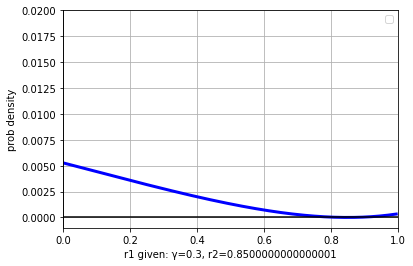

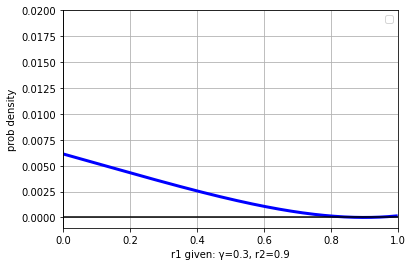

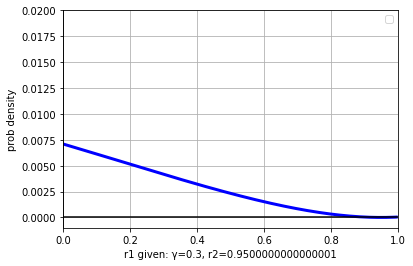

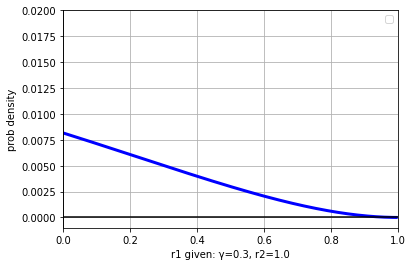

In [0]:
show_prob_given_y_gamma(0.3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


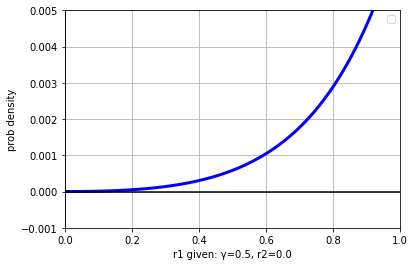

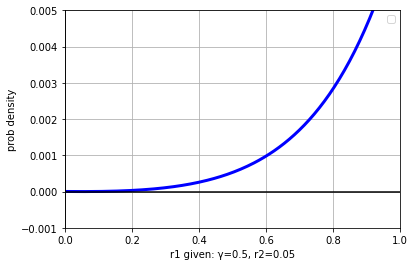

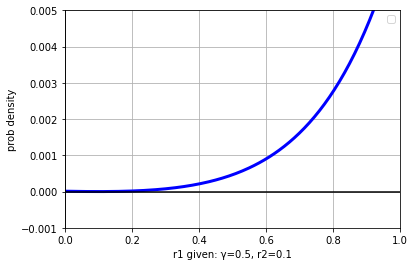

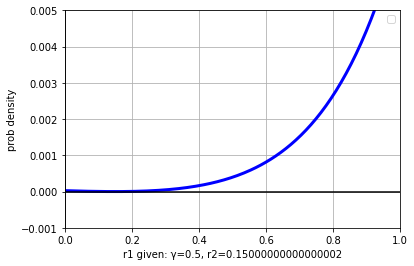

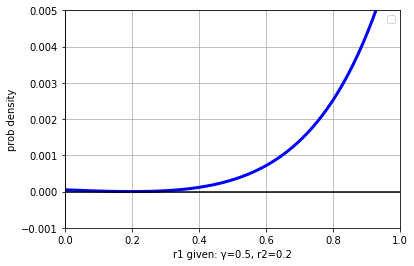

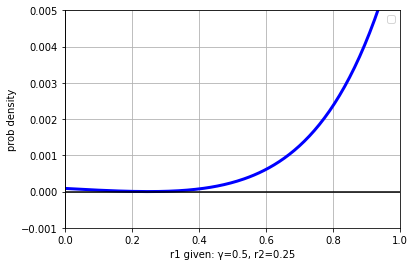

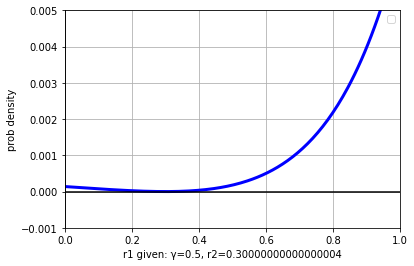

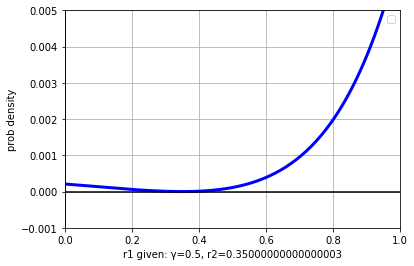

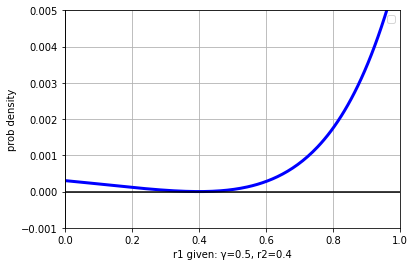

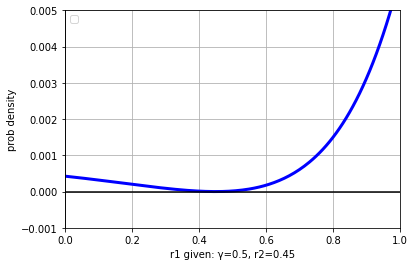

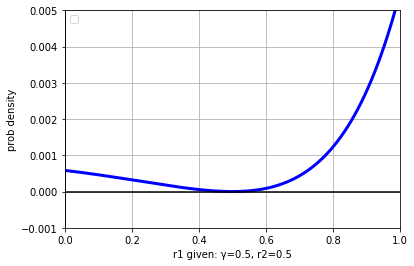

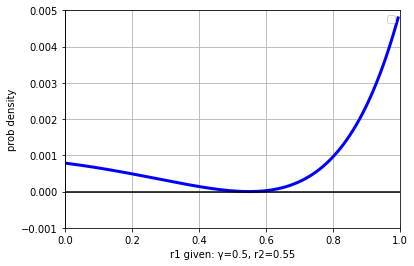

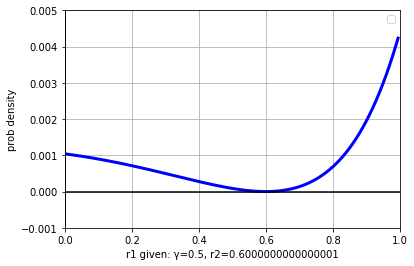

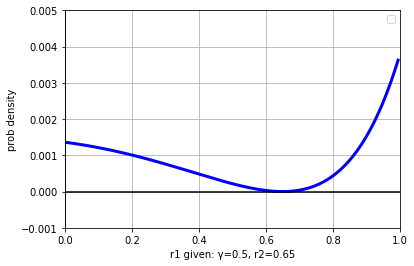

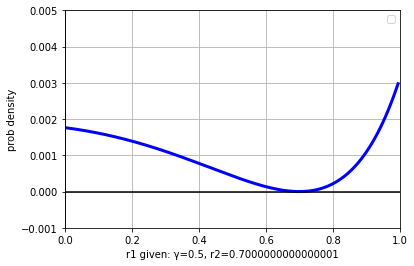

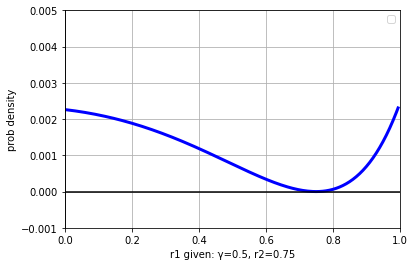

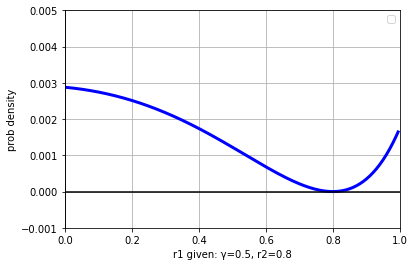

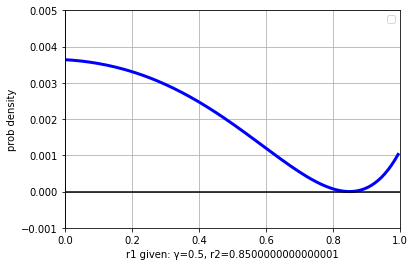

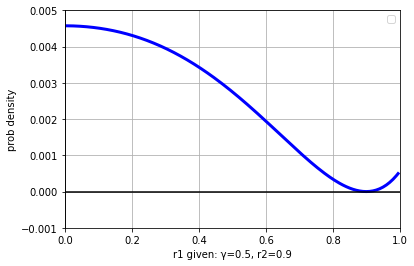

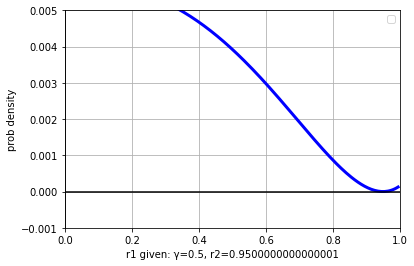

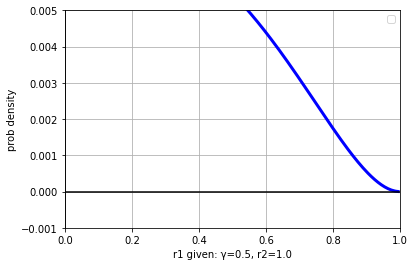

In [0]:
show_prob_given_y_gamma(0.5, ymax=0.005)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


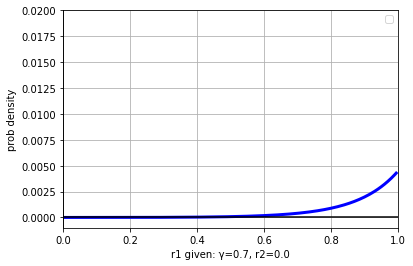

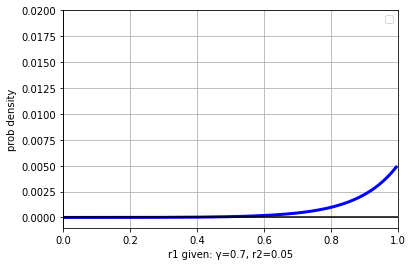

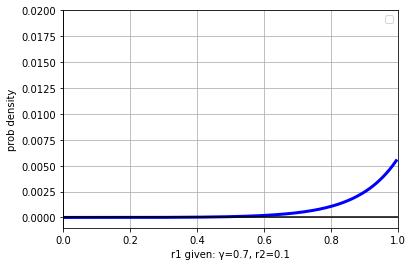

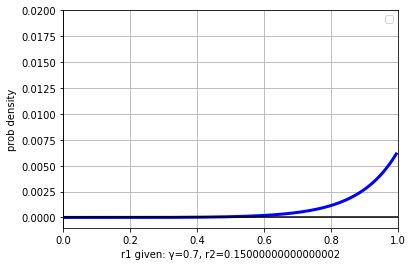

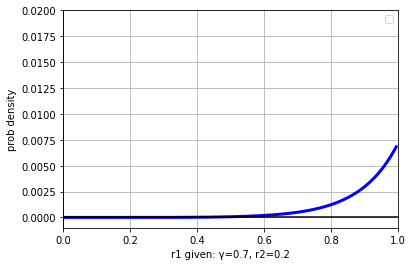

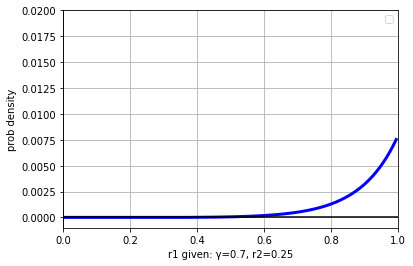

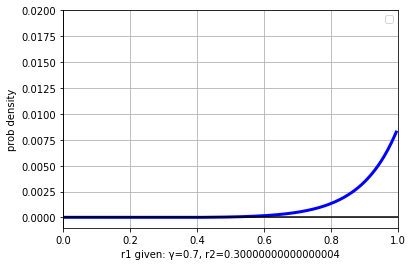

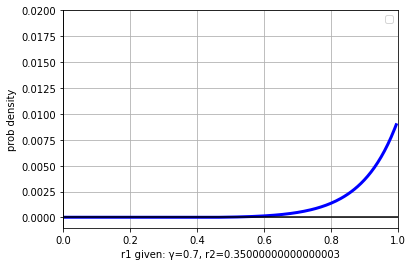

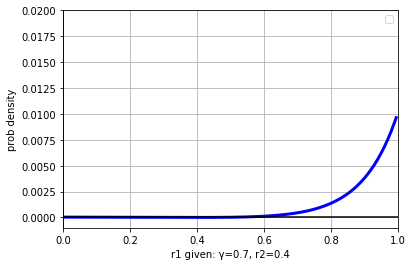

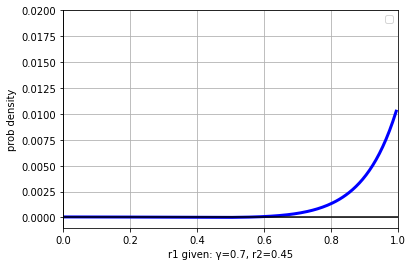

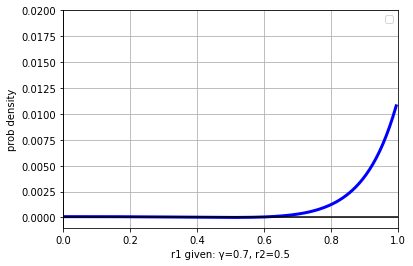

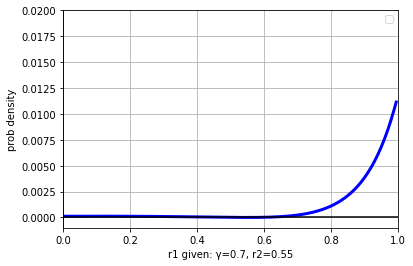

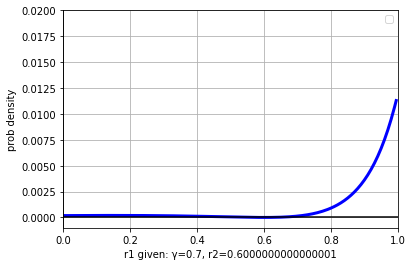

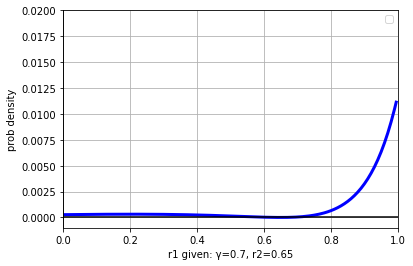

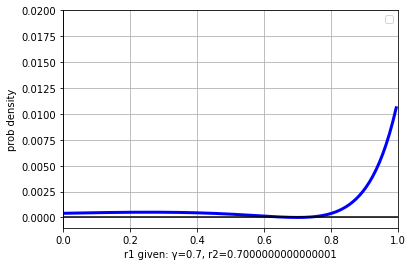

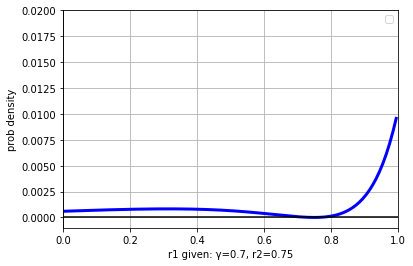

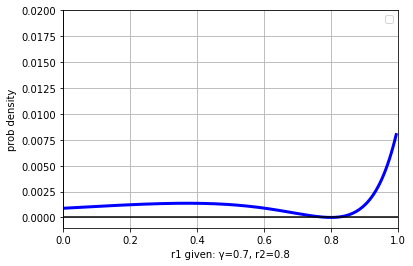

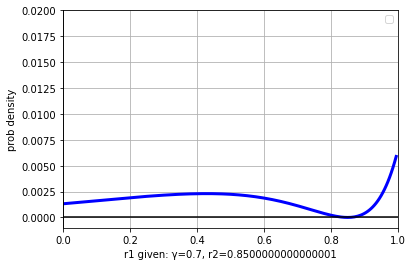

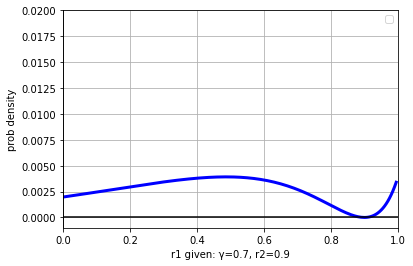

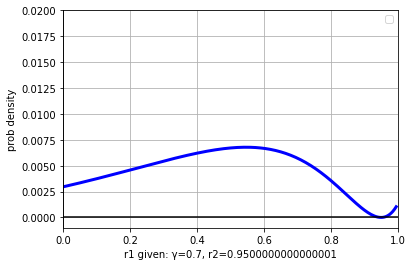

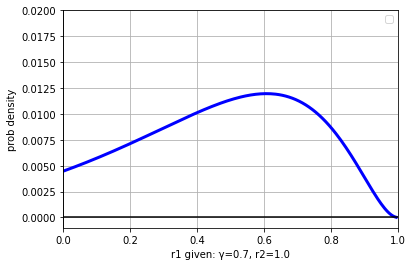

In [0]:
show_prob_given_y_gamma(0.7)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


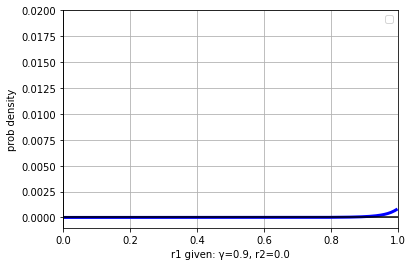

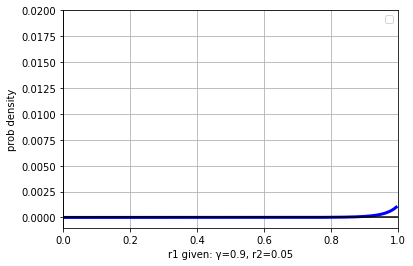

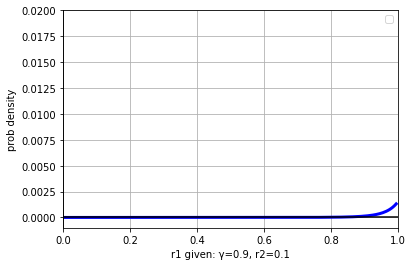

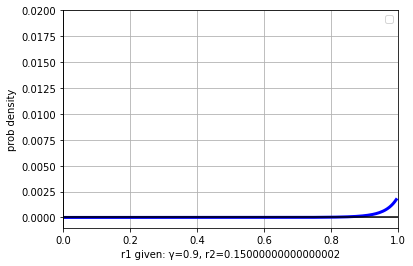

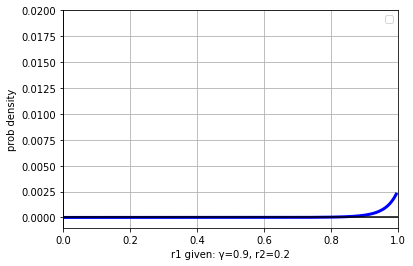

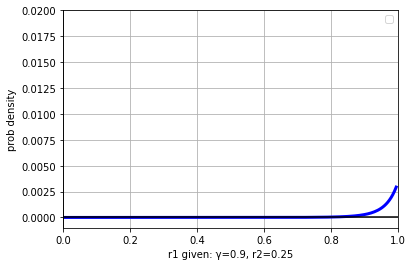

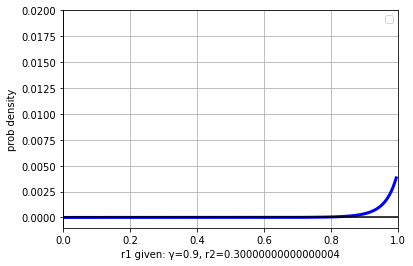

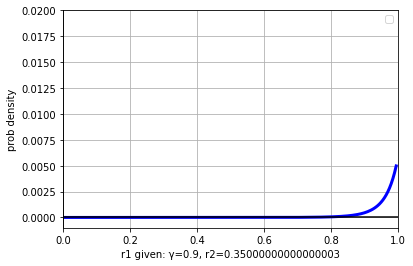

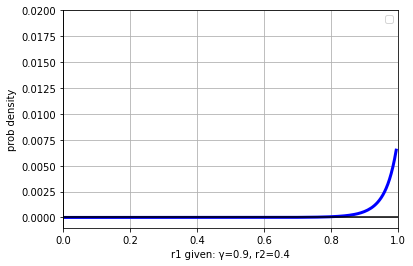

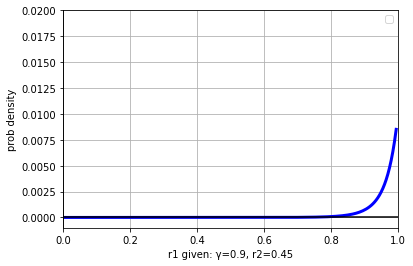

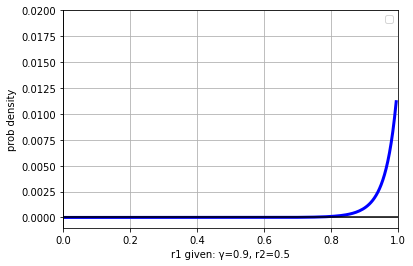

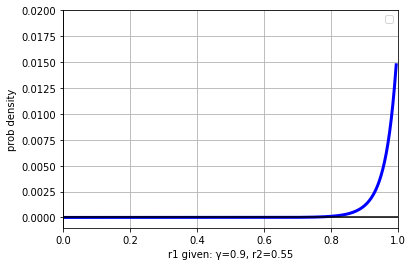

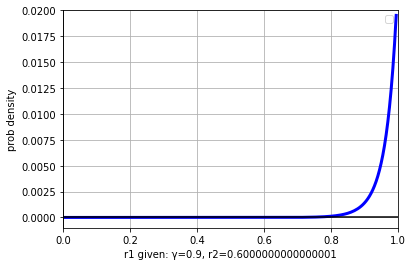

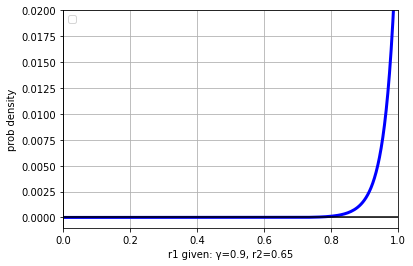

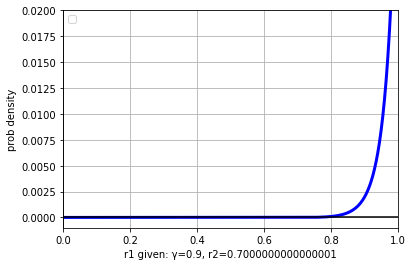

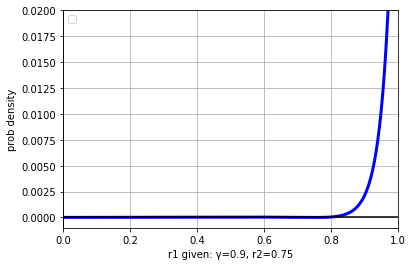

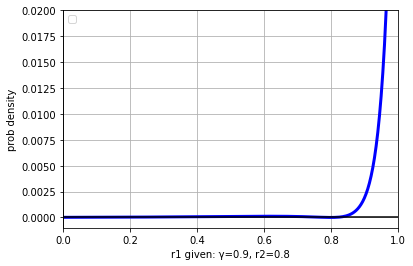

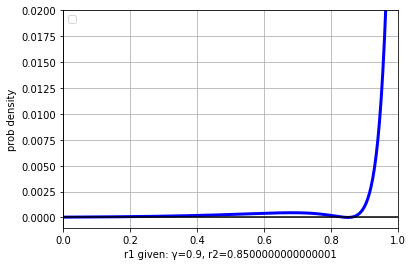

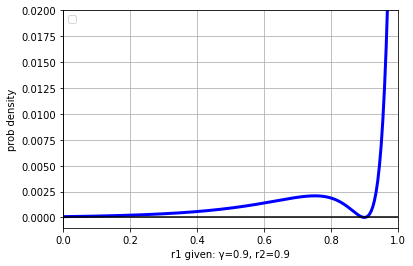

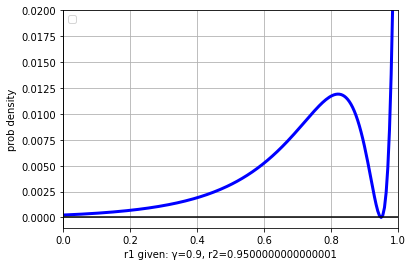

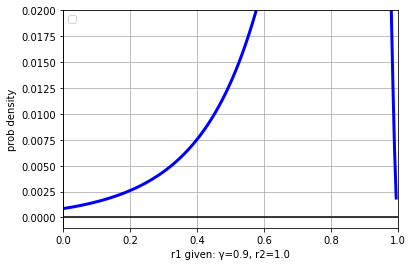

In [0]:
show_prob_given_y_gamma(0.9)

## Surface Plots

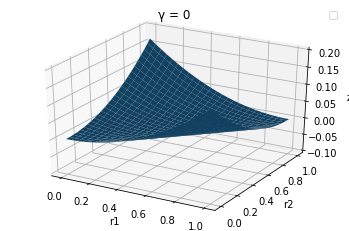

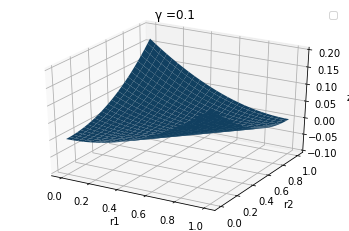

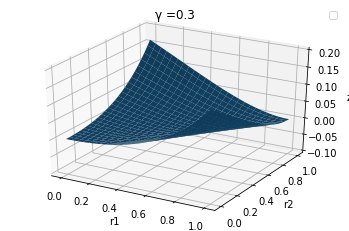

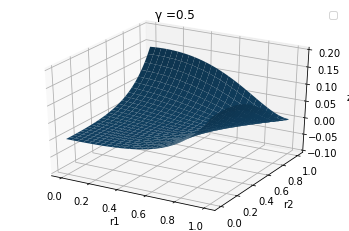

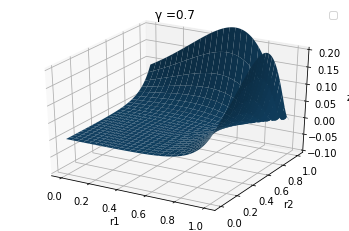

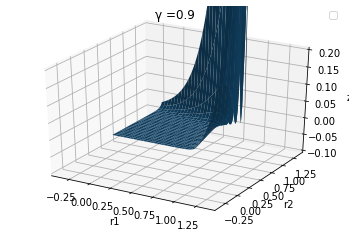

In [0]:
prob = lambda x, y: 20*prob_dist_2(0, x, y)
show_surface_plot(prob, title='γ = 0')
for gamma in gammas:
  prob = lambda x, y: 20*prob_dist_2(gamma, x, y)
  show_surface_plot(prob, title='γ =' + str(gamma))

## Rejection Reflection Eigenvalue Sampling

In [0]:
from numpy.random import rand
from IPython.display import clear_output

def find_max2d(gamma, r1_region, r2_region):
  max_height = 0
  for i in r1_region:
    for j in r2_region:
      h = prob_dist_2(gamma, i, j)
      max_height = max(max_height, h)
  return max_height

def sample_prob_dist_2(gamma, max_height):
  actual_density = 0
  sample_density = 1
  
  while (actual_density < sample_density):
    r1_sample = rand()
    r2_sample = rand()
    sample_density = mp.rand() * max_height
    actual_density = prob_dist_2(gamma, r1_sample, r2_sample)

  return r1_sample, r2_sample

def gen_2d_samples(gamma, num_of_samples):
  samples = []
  r1_region = np.arange(0,1,0.01)
  r2_region = r1_region
  max_height2d = find_max2d(gamma, r1_region, r2_region)

  for i in range(0, num_of_samples):
    samples.append(sample_prob_dist_2(gamma, max_height2d))
    clear_output(wait=True)
    print('Found sample ' + str(i+1) + ' for γ=' + str(gamma))
  return samples

In [0]:
# samples = []
# for gamma in gammas:
#   with open(str(gamma) + '.txt', 'r') as f:
#     sample_data = json.load(f)
#     samples.append(sample_data)

samples = []
for gamma in gammas:
  with open(str(gamma) + '_alt.txt', 'r') as f:
    sample_data = json.load(f)
    samples.append(sample_data)

# for gamma in [0.1, 0.3, 0.5, 0.7, 0.9]:
#   gamma_samples = gen_2d_samples(gamma, 1000)
#   with open(str(gamma) + '_alt.txt', 'w') as f:
#     json.dump(gamma_samples, f)
#   samples.append(gamma_samples)

FileNotFoundError: ignored

## Histograms of Sampling [IMP: Fittings for Hists]

In [0]:
def cond_of(r1, r2):
  return (1-r1 + 1-r2)

def shot_noise_of(r1, r2):
  return ((1-r1)*r1 + (1-r2)*r2)

### Conductance

In [0]:
cond_avgs = []
cond_vars = []
cond_thds = []
for i in range(0, len(samples)):
  gamma = gammas[i]
  ax = plt.subplot(111)
  cond_data = [cond_of(x,y) for (x, y) in samples[i]]
  cond_avg, cond_var, cond_thd = get_stats_of_data(cond_data, gamma)
  # space = np.linspace(0,2)
  # plt.plot(space, stats.norm.pdf(space, cond_avg, np.sqrt(cond_var)))
  plot_hist(cond_data,'Conductance', bins=20, ax=ax)
  # ax.legend(['Gaussian Fit','γ=' + str(gamma) +''])
  ax.legend(['γ=' + str(gamma) +''])

  cond_avgs.append(cond_avg)
  cond_vars.append(cond_var)
  cond_thds.append(cond_thd)

In [0]:
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(gammas, cond_avgs, marker='x', c='red', s=100)

cond_est = [cond_fst_moment(x) for x in gamma_space]
ax.plot(gamma_space, cond_est, '--',c='blue', linewidth=3)

cond_est = [2*cond_fst_moment(x) for x in gamma_space]
ax.plot(gamma_space, cond_est, '--',c='green', linewidth=3)
ax.set_xlabel('gamma (γ)')
ax.set_ylabel('Conductance Average')
ax.legend(['n=1 Cond. Average', 
           'n=1 Doubled Cond. Average',
           'n=2 Sampled Cond. Average'])
ax.grid(True)
ax.axhline(0, color='black')
ax.axvline(0, color='black')
plt.show()

In [0]:
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(gammas, cond_vars, marker='x', c='red', s=100)
ax.plot(gamma_space, [cond_snd_cumulant(g) for g in gamma_space], '--',c='blue', linewidth=3) # 0.85
ax.legend(['n=1 Cond. Variance', 'n=2 Sampled Cond. Variance'])
ax.grid(True)
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.set_xlabel('gamma (γ)')
ax.set_ylabel('Conductance Variance')
plt.show()

##### Fix Needed Here

In [0]:
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(gammas, cond_thds, marker='x', c='red', s=100)
temp_space = np.linspace(0.05, 1)
cond_est = [cond_thd_cumulant(x) for x in temp_space]
ax.plot(temp_space, cond_est, '--',c='blue', linewidth=3)
# show_plot(0,1,cond_thd_cumulant, ax=ax, y_lim=[-0.01,0.02])
ax.legend(['n=1 Thd. Cumulant', 'n=2 Sampled Cumulants'])
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.set_xlabel('gamma (γ)')
ax.set_ylabel('Conductance Thd Cumulant')
ax.set_xlim(0,1)
ax.grid(True)
plt.show()

### Shot Noise

In [0]:
shot_avgs = []
shot_vars = []
shot_thds = []
for i in range(0, len(samples)):
  gamma = gammas[i]
  shot_data = [shot_noise_of(x,y) for (x, y) in samples[i]]
  plot_hist(shot_data,'Shot Noise (γ=' + str(gamma) +')', bins=20, x_lim=[0,0.5])
  shot_avg, shot_var, shot_thd = get_stats_of_data(shot_data, gamma)

  shot_avgs.append(shot_avg)
  shot_vars.append(shot_var)
  shot_thds.append(shot_thd)

In [0]:
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(gammas, shot_avgs, marker='x', c='red', s=100)

shot_est = [shot_fst_cumulant(x) for x in gamma_space]
ax.plot(gamma_space, shot_est, '--',c='green', linewidth=3)

ax.legend(['n=1 Shot. Average', 'n=2 Sampled Shot Average'])
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.set_xlabel('gamma (γ)')
ax.set_ylabel('Shot Noise Average')
ax.grid(True)
plt.show()

In [0]:
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(gammas, shot_vars, marker='x', c='red', s=100, zorder=3)
show_plot(0,1,shot_snd_cumulant,ax=ax)
# temp_space = np.linspace(0.07, 1)
# ax.plot(temp_space, [shot_snd_cumulant(g) for g in temp_space], '--',c='green', linewidth=3)
ax.legend(['n=1 Shot Variance'])
ax.set_xlabel('gamma (γ)')
ax.set_ylabel('Shot Noise Variance')
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.set_ylim(0,0.02)
plt.show()

In [0]:
fig = plt.figure()
ax = plt.subplot(111)
show_plot(0,1,hyp_shot_thd,ax=ax, y_lim=[-0.001,0.001])
ax.scatter(gammas, shot_thds, marker='x', c='red', s=100, zorder=3)
ax.legend(['n=1 Shot Noise Third Cumulant'])
ax.set_xlabel('gamma (γ)')
ax.set_ylabel('Shot Noise Third Cumulant')
ax.axhline(0, color='black')
ax.axvline(0, color='black')
plt.show()

## Kernel Density Estimation

In [0]:
for i in range(0, len(samples)):
  gamma = gammas[i]
  ax = plt.subplot(111)
  cond_data = [cond_of(x,y) for (x, y) in samples[i]]
  est = stats.gaussian_kde(cond_data)
  space = np.linspace(0,2,200)
  est.set_bandwidth(0.5)
  plt.plot(space, est.evaluate(space), lw=3)
  plot_hist(cond_data,'Conductance', bins=20, ax=ax, color='skyblue')
  ax.legend(['Kernel Density Gaussian Fit','γ=' + str(gamma) +' samples'])

In [0]:
for i in range(0, len(samples)):
  gamma = gammas[i]
  ax = plt.subplot(111)
  shot_data = [shot_noise_of(x,y) for (x, y) in samples[i]]
  est = stats.gaussian_kde(shot_data)
  est.set_bandwidth(0.2)
  space = np.linspace(0,0.5,200)
  plt.plot(space, est.evaluate(space), lw=3)
  plot_hist(shot_data,'Shot Noise', bins=20, ax=ax, x_lim=[0,0.5], color='skyblue')
  ax.legend(['Kernel Density Gaussian Fit','γ=' + str(gamma) +' samples'])

# Large Range Sampling

In [0]:
gamma_100 = np.linspace(0,1,100,endpoint=False)
print(gamma_100)

In [0]:
samples2d = []
# for g in gamma_100:
#   gamma_samples = gen_2d_samples(g, 1000)
#   samples2d.append(gamma_samples)

# with open('100g_samples.txt', 'w') as f:
#   json.dump(samples2d, f)

with open('100g_samples.txt', 'r') as f:
  samples2d = json.load(f)

## Conductance

In [0]:
cond_avgs_2d = []
cond_vars_2d = []
cond_thds_2d = []
for i in range(0, len(samples2d)):
  gamma = gamma_100[i]
  ax = plt.subplot(111)
  cond_data = [cond_of(x,y) for (x, y) in samples2d[i]]
  cond_avg, cond_var, cond_thd = get_stats_of_data(cond_data, gamma)
  plot_hist(cond_data,'Conductance', bins=20, ax=ax)
  ax.legend(['γ=' + str(gamma) +''])

  cond_avgs_2d.append(cond_avg)
  cond_vars_2d.append(cond_var)
  cond_thds_2d.append(cond_thd)  

In [0]:
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(gamma_100, cond_avgs_2d, marker='x', c='red', s=100)
cond_est = [cond_fst_moment(x) for x in gamma_100]
ax.plot(gamma_100, cond_est, '--',c='blue', linewidth=3)
ax.set_xlabel('gamma (γ)')
ax.set_ylabel('Conductance Average')
ax.legend(['n=1 Cond. Average'])
ax.grid(True)
ax.axhline(0, color='black')
ax.axvline(0, color='black')
plt.show()

In [0]:
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(gamma_100, cond_vars_2d, marker='x', c='red', s=100)
show_plot(0,1,cond_snd_cumulant,ax=ax, y_lim=[0,0.1])

ax.set_xlabel('gamma (γ)')
ax.set_ylabel('Conductance Variance')
ax.legend(['n=1 Conductance Variance'])
ax.grid(True)
ax.axhline(0, color='black')
ax.axvline(0, color='black')
plt.show()

In [0]:
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(gamma_100, cond_thds_2d, marker='x', c='red', s=100)
show_plot(0,1,cond_thd_cumulant,ax=ax, y_lim=[-0.01,0.015])
ax.set_xlabel('gamma (γ)')
ax.set_ylabel('Conductance Third Cumulant')
ax.legend(['n=1 Conductance Third Cumulant'])
ax.grid(True)
ax.axhline(0, color='black')
ax.axvline(0, color='black')
plt.show()

## Shot Noise

In [0]:
shot_avgs_2d = []
shot_vars_2d = []
shot_thds_2d = []
for i in range(0, len(samples2d)):
  gamma = gamma_100[i]
  shot_data = [shot_noise_of(x,y) for (x, y) in samples2d[i]]
  plot_hist(shot_data,'Shot Noise (γ=' + str(gamma) +')', bins=20, x_lim=[0,0.5])
  shot_avg, shot_var, shot_thd = get_stats_of_data(shot_data, gamma)

  shot_avgs_2d.append(shot_avg)
  shot_vars_2d.append(shot_var)
  shot_thds_2d.append(shot_thd)

In [0]:
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(gamma_100, shot_avgs_2d, marker='x', c='red', s=100)
shot_est = [shot_fst_cumulant(x) for x in gamma_100]
ax.plot(gamma_100, shot_est, '--',c='blue', linewidth=3)

ax.legend(['n=1 Shot Average'])
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.set_xlabel('gamma (γ)')
ax.set_ylabel('Shot Noise Average')
ax.grid(True)
plt.show()

In [0]:
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(gamma_100, shot_vars_2d, marker='x', c='red', s=100)
show_plot(0,1,shot_snd_cumulant,ax=ax, y_lim=[0,0.012])
ax.legend(['n=1 Shot Noise Variance'])
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.set_xlabel('gamma (γ)')
ax.set_ylabel('Shot Noise Variance')
ax.grid(True)
plt.show()

In [0]:
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(gamma_100, shot_thds_2d, marker='x', c='red', s=100)
show_plot(0,1, hyp_shot_thd, ax=ax, y_lim=[-0.0004,0.0004])
ax.legend(['n=1 Shot Third Cumulant'])
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.set_xlabel('gamma (γ)')
ax.set_ylabel('Shot Noise Third Cumulant')
ax.grid(True)
plt.show()